# MACHINE LEARNING

__Import & EDA__

In [34]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

fruits = pd.read_table(r'https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/fruit_data_with_colors.txt')
fruits.head()


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


Use PAIRPLOT to show distributions per IV and category


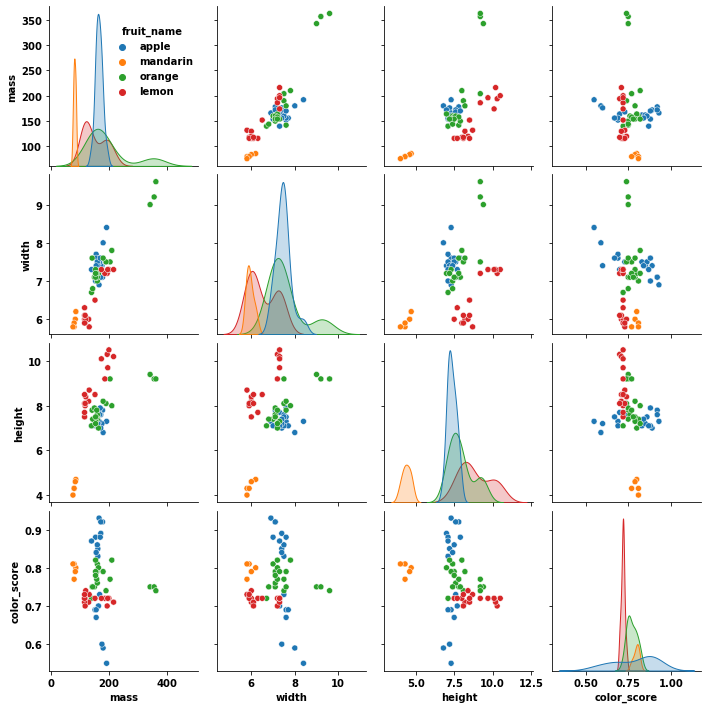

In [35]:
print('Use PAIRPLOT to show distributions per IV and category')
IVs = ['mass', 'width', 'height', 'color_score']
DV = ['fruit_label']
g = sns.pairplot(fruits, vars = IVs, hue = 'fruit_name', kind = 'scatter', diag_kind='kde', height=2.5);
g._legend.set_bbox_to_anchor((.25, .9))


As mass is redundant with width and height, so lets drop it and plot the remaining 3 IVs against the category labels
SCATTER 3D: specify projection in subplot - requires MPL_TOOLKIT.MPLOT3D


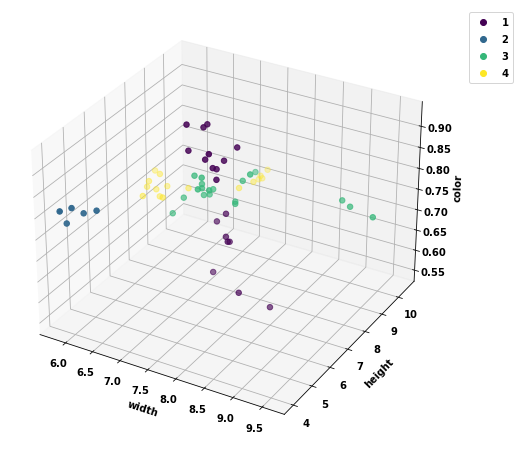

In [36]:
print('As mass is redundant with width and height, so lets drop it and plot the remaining 3 IVs against the category labels')
print('SCATTER 3D: specify projection in subplot - requires MPL_TOOLKIT.MPLOT3D')
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')
sc = ax.scatter(fruits['width'], fruits['height'], fruits['color_score'], s = 30, c= fruits['fruit_label'])
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color')
ax.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2);


In [37]:
print('KNN TEST RUN')
print('Define FEATS')
X = fruits[IVs]
Y = fruits[DV]
print('Perform *train_test_split*')
from sklearn.model_selection import train_test_split
from scipy import stats 
print('DO NOT FORGET TO Z-TRANSFORM')
xTrain, xTest, yTrain, yTest = train_test_split(stats.zscore(fruits[IVs], axis=0), fruits[DV], random_state = 0)
print('\nDict for looking up label names')
DV_legend = dict(zip(fruits['fruit_label'], fruits['fruit_name']))
print(DV_legend)

print('\nRun KNN classifier *KNeighborsClassifier*')
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 2)
#KNN.fit(xTrain, yTrain) # works too but throws warning
KNN.fit(xTrain, np.ravel(yTrain))
print('Prediction accuracy ' + str(KNN.score(xTest, yTest)))
print('\nPredict an item with feats typical for a mandarine:')
a = KNN.predict([[20, 4.3, 5.5, .7]])
print(DV_legend[a[0]])


KNN TEST RUN
Define FEATS
Perform *train_test_split*
DO NOT FORGET TO Z-TRANSFORM

Dict for looking up label names
{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

Run KNN classifier *KNeighborsClassifier*
Prediction accuracy 0.8666666666666667

Predict an item with feats typical for a mandarine:
orange


C:\Users\s01tk9\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# KNeighborsClassifier
__Classify / predict k category labels__

Fruits example
PREDICTION using MASS & COL
count     44
unique     4
top        1
freq      15
Name: fruit_label, dtype: int64
Baserate: 0.27 | = p_modeTrainInTest 
(pick most frequent category from training set, and guess it for the test set


Text(0.5, 1.0, 'Influence of N (# neighbors) on classifier accuracy')

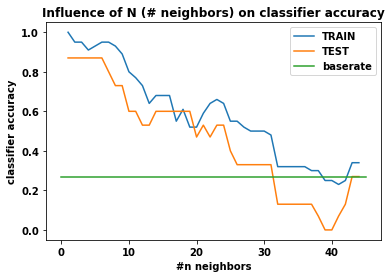

In [38]:
print('Fruits example\nPREDICTION using MASS & COL')
from scipy import stats
feats = ['mass', 'color_score']
xTrain, xTest, yTrain, yTest = train_test_split(stats.zscore(fruits[feats], axis=0), fruits.fruit_label, random_state = 0)

top_label = yTrain.astype('category').describe()
print(top_label)
top_label = top_label.loc['top']
baserate = np.sum(yTest == top_label)/float(len(yTest))
print('Baserate: {} | = p_modeTrainInTest \n(pick most frequent category from training set, and guess it for the test set'.format(round(baserate,2)))

resTest = []; resTrain = []; 
xRange = list(range(1,1+len(xTrain)))
for ind in xRange:    
    KNN = KNeighborsClassifier(n_neighbors = ind)
    KNN.fit(xTrain, np.ravel(yTrain))    
    pred = KNN.score(xTrain, yTrain)
    resTrain.append(round(pred,2))
    pred = KNN.score(xTest, yTest)
    resTest.append(round(pred,2))
    #plt.scatter(ind,pred, 100, c='black')    
    
plt.plot(xRange, resTrain, label = 'TRAIN')
plt.plot(xRange, resTest, label = 'TEST')

#print('Prediction accuracies: {}'.format(res))
plt.plot([0, xRange[-1]+1], [baserate, baserate], label = 'baserate')
plt.legend()
plt.xlabel('#n neighbors')
plt.ylabel('classifier accuracy')
plt.title('Influence of N (# neighbors) on classifier accuracy')

Check FEATURE IMPORTANCE for ONE neighbor (eg using the *permutation_importance*)
Feature: 0, Score: 0.44000
Feature: 1, Score: 1.60000

Plotting feat importance as a function of N neighbors


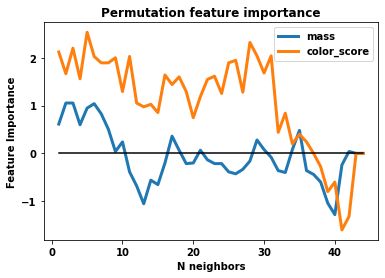

PERMUTATION FEATURE IMPORTANCE is defined to be the decrease in a model score when a single feature value is randomly shuffled 1. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature.


In [39]:
KNN = KNeighborsClassifier(n_neighbors = 1, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski') #p = 2 -> EUCLIDEAN DIST
KNN.fit(xTrain, np.ravel(yTrain))    
print('Check FEATURE IMPORTANCE for ONE neighbor (eg using the *permutation_importance*)')
from sklearn.inspection import permutation_importance
results = permutation_importance(KNN, xTest, yTest, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

print('\nPlotting feat importance as a function of N neighbors')
res=[]
xRange = list(range(1,1+len(xTrain)))
for ind in xRange:    
    KNN = KNeighborsClassifier(n_neighbors = ind, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski') #p = 2 -> EUCLIDEAN DIST
    KNN.fit(xTrain, np.ravel(yTrain))    
    results = permutation_importance(KNN, xTest, yTest, scoring='neg_mean_squared_error')
    # get importance
    importance = results.importances_mean
    for i,v in enumerate(importance):
        res.extend([i,v])

res = np.array(res).reshape((len(xRange)*2,2))
res0 = res[res[:,0]==0, 1]
res1 = res[res[:,0]==1, 1]

sns.lineplot(x=xRange, y = res0,lw=3,markers='o', label = feats[0])
sns.lineplot(x=xRange, y = res1,lw=3,markers='o', label = feats[1])
sns.lineplot(x=[np.min(xRange), np.max(xRange)], y = [0,0], color = 'k')
plt.xlabel('N neighbors'); plt.ylabel('Feature Importance'); plt.title('Permutation feature importance')#plt.grid()
plt.show()
print('PERMUTATION FEATURE IMPORTANCE is defined to be the decrease in a model score when a single feature value is randomly shuffled 1. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature.')

DECISION BOUNDARY for 2 IVs


C:\Users\s01tk9\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Circles = train set, Squares = test set


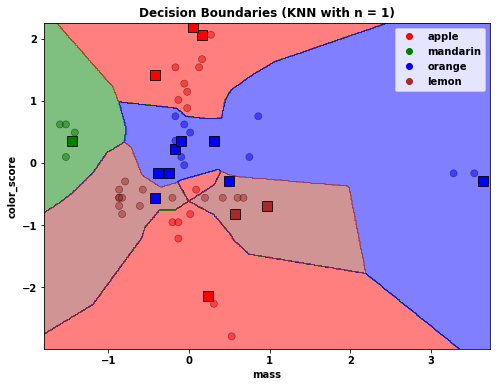

In [40]:
KNN = KNeighborsClassifier(n_neighbors = 1, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski') #p = 2 -> EUCLIDEAN DIST
KNN.fit(xTrain, np.ravel(yTrain))    
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
print('DECISION BOUNDARY for 2 IVs')
stepSize=.01
offset = .2
x_min, x_max = xTrain[feats[0]].min() - offset, xTrain[feats[0]].max() + offset
y_min, y_max = xTrain[feats[1]].min() - offset, xTrain[feats[1]].max() + offset
xx, yy = np.meshgrid(np.arange(x_min, x_max, stepSize), np.arange(y_min, y_max, stepSize))
Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()]) # create N * 2 matrix, where column = 1 is xx and col 2 = yy

from matplotlib.colors import ListedColormap
myCols = ['red', 'green', 'blue', 'brown']
cMap = ListedColormap(myCols)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
g = plt.contourf(xx, yy, Z, alpha=.5,cmap = cMap)

# Training points
sns.scatterplot(
    x=xTrain[feats[0]],
    y=xTrain[feats[1]],
    hue=yTrain,
    alpha=.5,
    s = 50,
    edgecolor="black",
    palette= cMap
)
# ... and test dots
sns.scatterplot(
    x=xTest[feats[0]],
    y=xTest[feats[1]],
    s = 100,
    marker='s',
    hue=yTest,
    alpha=1.0,
    edgecolor="black",
    palette = cMap
)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
# Use PROXY ARTIST for legend
colPatches = []; legLabels = list(DV_legend.values())
for x in range(0,len(myCols)):
    colPatches.append(plt.Line2D([], [], color=myCols[x], marker="o", linewidth=0, label=legLabels[x]))
plt.legend(handles=colPatches); plt.title('Decision Boundaries (KNN with n = 1)');
print('Circles = train set, Squares = test set')


# Regression: KNN versus LinReg
__UNIVARIATE (1 predictor)__

This is the disribution of 2 variables: Socio-eco background vs crime


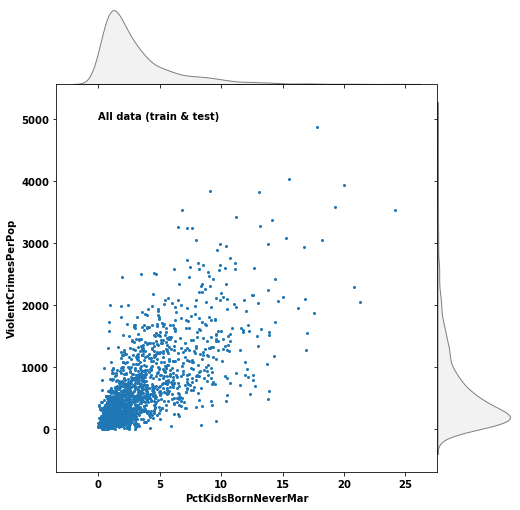

Train / test split, training
Note that increasing N-neighbors reduces variances (and may increas bias)


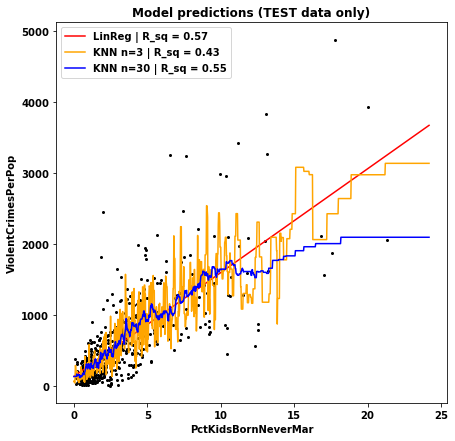

In [41]:
crime = pd.read_table(r"https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/CommViolPredUnnormalizedData.txt", sep=',', na_values='?')
# remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
crime = crime[crime.columns[columns_to_keep]].dropna()

X = np.array(crime.PctKidsBornNeverMar) # Percentage of kids born to Never-Marrieds
Y = np.array(crime.ViolentCrimesPerPop)

print('This is the disribution of 2 variables: Socio-eco background vs crime')
g = sns.JointGrid(x=X, y=Y, space=0, height=7);
#g.plot_joint(sns.regplot, line_kws={'color': 'red'}, scatter_kws={'s': 4}, truncate=False)
g.plot_joint(plt.scatter,s=4)
g.plot_marginals(sns.kdeplot, fill=True, alpha=.1, color='gray');
g.ax_joint.set_xlabel('PctKidsBornNeverMar')
g.ax_joint.set_ylabel('ViolentCrimesPerPop')
plt.annotate('All data (train & test)', xy=[0,5000])
plt.show()

print('Train / test split, training')
plt.figure(figsize=(7,7))
# separate scatters for train & test
xTrain, xTest, yTrain, yTest = train_test_split(X,Y, random_state=0)
#plt.scatter(xTrain, yTrain, c='blue', s=5)
plt.scatter(xTest, yTest, c='black', s=4)

# now model fitting & plotting with LINREG ... 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(xTrain.reshape(-1,1), yTrain)
plt.plot([xTrain.min(), xTrain.max()], [xTrain.min(), xTrain.max()]*linreg.coef_ + linreg.intercept_, c='red', label='LinReg | R_sq = {}'.format(round(linreg.score(xTest.reshape(-1,1), yTest),2)))

# .. and KNN
from sklearn.neighbors import KNeighborsRegressor
xx = np.linspace(0,xTrain.max(),1000)
KNN = KNeighborsRegressor(n_neighbors=3).fit(xTrain.reshape(-1,1),yTrain)
y_predict = KNN.predict(xx.reshape(-1,1))
plt.plot(xx, y_predict, c='orange',label='KNN n=3 | R_sq = {}'.format(round(KNN.score(xTest.reshape(-1,1), yTest),2)))
KNN = KNeighborsRegressor(n_neighbors=30).fit(xTrain.reshape(-1,1),yTrain)
y_predict = KNN.predict(xx.reshape(-1,1))


plt.plot(xx, y_predict, c='blue',label='KNN n=30 | R_sq = {}'.format(round(KNN.score(xTest.reshape(-1,1), yTest),2)))
plt.xlabel('PctKidsBornNeverMar')
plt.ylabel('ViolentCrimesPerPop')
plt.title('Model predictions (TEST data only)')
plt.legend()
print('Note that increasing N-neighbors reduces variances (and may increas bias)')

# Regression: KNN versus LinReg (pt 2) & feature normalization
__MASSIVE MULTIVARIATE (88 predictors)__

Use all 88 feats in the crime data set to predict crime. But first, NORMALIZE feats to compensate for the diverse variable range (use MinMax or StandardScaler). Do this only for train data & apply to test - do not transform the criterion

Output of MinMaxScaler for TEST set: Mean = 0.324 STD = 0.268 Min = -0.156 Max = 4.994
Output of standard scaler for TEST set: Mean = 0.013 STD = 1.354 Min = -6.432 Max = 94.773

Ordinary least squares (OLS) is straightforward, but may lead to overfitting (compare the drop in R_sq in test relative to train set
LinearRegression (OLS): R_sq Train = 0.673 R_sq Test = 0.492 || intercept = 589.34
KNN with standard settings (n = 5): R_sq Train = 0.698 R_sq Test = 0.541

Choosing the best n-setting for KNN with 88 feats


Text(0.5, 1.0, 'KNN with 88 features: influence of N')

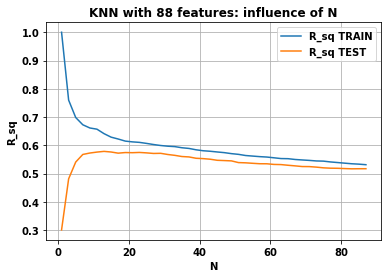

In [42]:
print('Use all 88 feats in the crime data set to predict crime. But first, NORMALIZE feats to compensate for the diverse variable range (use MinMax or StandardScaler). Do this only for train data & apply to test - do not transform the criterion')
X = crime[crime.columns[:-1]]
xTrain, xTest, yTrain, yTest = train_test_split(X,Y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler().fit(xTrain)
xTrain_s = scaler.transform(xTrain)
xTest_s = scaler.transform(xTest)
print('\nOutput of MinMaxScaler for TEST set: Mean = {} STD = {} Min = {} Max = {}'.format(round(np.mean(xTest_s),3), round(np.std(xTest_s),3), round(np.min(xTest_s),3), round(np.max(xTest_s),3)))
scaler = StandardScaler().fit(xTrain)
xTrain = scaler.transform(xTrain)
xTest = scaler.transform(xTest)
print('Output of standard scaler for TEST set: Mean = {} STD = {} Min = {} Max = {}'.format(round(np.mean(xTest),3), round(np.std(xTest),3), round(np.min(xTest),3), round(np.max(xTest),3)))

print('\nOrdinary least squares (OLS) is straightforward, but may lead to overfitting (compare the drop in R_sq in test relative to train set')
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(xTrain, yTrain)
print('LinearRegression (OLS): R_sq Train = {} R_sq Test = {} || intercept = {}'.format(round(linreg.score(xTrain,yTrain),3), round(linreg.score(xTest, yTest),3), round(linreg.intercept_,2)))

KNN = KNeighborsRegressor().fit(xTrain,yTrain)
print('KNN with standard settings (n = 5): R_sq Train = {} R_sq Test = {}'.format(round(KNN.score(xTrain,yTrain),3), round(KNN.score(xTest, yTest),3)))

print('\nChoosing the best n-setting for KNN with 88 feats')
resTrain = []; resTest = []
nRange=range(1, np.shape(xTrain)[1]+1,2)
for n in nRange:
    KNN = KNeighborsRegressor(n_neighbors = n).fit(xTrain,yTrain)
    resTrain.append(KNN.score(xTrain, yTrain))
    resTest.append(KNN.score(xTest, yTest))
    
plt.plot(nRange, resTrain, label = 'R_sq TRAIN')
plt.plot(nRange, resTest, label = 'R_sq TEST')
plt.xlabel('N');plt.ylabel('R_sq');plt.legend(); plt.grid(); plt.title('KNN with 88 features: influence of N')

# LinearRegression: Ridge & Lasso 
__REGULARIZATION (to prevent overfitting)__

REGULARIZATION prevents overfitting by using penalties per feature. In fact, the feat weights are penalized. The most common types of regularized linear regression are RIDGE and LASSO. Both take an alpha parameter (corresponds to Andy Ngs lambda).

RIDGE reg minimizes L2 (sum of squared weights). It is good if there are many IVs with small influences. LASSO reg minimizes L1 (sum of abs weights) and effectively sets the weights for poor features to Zero - easy to interpret, and preferable if there are a couple of effective IVs.

OLS Baseline (no REG): R_sq Train = 0.673 R_sq Test = 0.492 || intercept = 589.34
RIDGE (alpha = 20): R_sq Train = 0.667 R_sq Test = 0.498 || intercept = 589.29
LASSO (alpha = 20): R_sq Train = 0.629 R_sq Test = 0.591 || intercept = 589.29

To choose the right alpha, vary alpha and observe R_sq curves for training & test set. Find the sweet spot


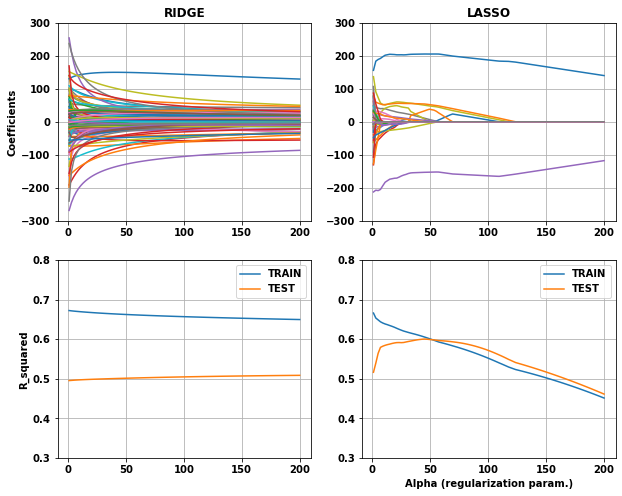

Note the gradual SHRINKING of coefficients with the RIDGE reg, and the ELIMINATION with LASSO


In [43]:
print('REGULARIZATION prevents overfitting by using penalties per feature. In fact, the feat weights are penalized. The most common types of regularized linear regression are RIDGE and LASSO. Both take an alpha parameter (corresponds to Andy Ngs lambda).')
print('\nRIDGE reg minimizes L2 (sum of squared weights). It is good if there are many IVs with small influences. LASSO reg minimizes L1 (sum of abs weights) and effectively sets the weights for poor features to Zero - easy to interpret, and preferable if there are a couple of effective IVs.')
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# for comparison: OLS
linreg = LinearRegression().fit(xTrain, yTrain)
print('\nOLS Baseline (no REG): R_sq Train = {} R_sq Test = {} || intercept = {}'.format(round(linreg.score(xTrain,yTrain),3), round(linreg.score(xTest, yTest),3), round(linreg.intercept_,2)))

temp = Ridge(alpha=20).fit(xTrain, yTrain)
print('RIDGE (alpha = 20): R_sq Train = {} R_sq Test = {} || intercept = {}'.format(round(temp.score(xTrain,yTrain),3), round(temp.score(xTest, yTest),3), round(temp.intercept_,2)))
temp = Lasso(alpha=20, max_iter = 10000).fit(xTrain, yTrain)
print('LASSO (alpha = 20): R_sq Train = {} R_sq Test = {} || intercept = {}'.format(round(temp.score(xTrain,yTrain),3), round(temp.score(xTest, yTest),3), round(temp.intercept_,2)))

print('\nTo choose the right alpha, vary alpha and observe R_sq curves for training & test set. Find the sweet spot')
nRange = np.linspace(1,200, 100)
resTrain = []; resTest=[]; resTrainL = []; resTestL =[]; ridgeCoef = []; lassoCoef=[]
for n in nRange:
    temp = Ridge(alpha=n).fit(xTrain, yTrain)
    resTrain.append(temp.score(xTrain, yTrain))
    resTest.append(temp.score(xTest, yTest))
    ridgeCoef.append(temp.coef_)
    temp = Lasso(alpha=n, max_iter=10000).fit(xTrain, yTrain)
    resTrainL.append(temp.score(xTrain, yTrain))
    resTestL.append(temp.score(xTest, yTest))
    lassoCoef.append(temp.coef_)

fig, ax = plt.subplots(2,2, figsize=(10,8))
ax[0,0].plot(nRange, ridgeCoef)
ax[0,0].set_title('RIDGE')
ax[0,0].set_ylabel('Coefficients')
ax[1,0].plot(nRange, resTrain, label = 'TRAIN')
ax[1,0].plot(nRange, resTest, label = 'TEST')
ax[1,0].set_ylabel('R_squared')

ax[0,1].set_title('LASSO')
ax[0,1].plot(nRange, lassoCoef)
ax[1,1].plot(nRange, resTrainL, label = 'TRAIN')
ax[1,1].plot(nRange, resTestL, label = 'TEST')
ax[1,1].set_xlabel('Alpha (regularization param.)')

[thisAx.grid() for thisAx in ax.reshape(-1)]
[thisAx.set_ylim([-300, 300]) for thisAx in ax[0,:].reshape(-1)]
[thisAx.set_ylim([.3, .8]) for thisAx in ax[1,:].reshape(-1)]
[thisAx.legend() for thisAx in ax[1,:].reshape(-1)]
plt.show()
print('Note the gradual SHRINKING of coefficients with the RIDGE reg, and the ELIMINATION with LASSO')


Feature importance: Find the 5 best predictors for Lasso with alpha = 50 (Number of weights set to Zero: 8)


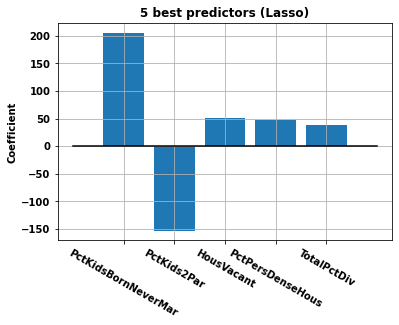

Note: Percentage of kids with never-married parents is a POSITIVE crime predictor, percentage of kids in families with 2 parents (aka intact families) is a NEGATIVE predictor


In [44]:
temp = Lasso(alpha=50, max_iter=10000).fit(xTrain, yTrain)
print('\nFeature importance: Find the 5 best predictors for Lasso with alpha = 50 (Number of weights set to Zero: {})'.format(np.sum(temp.coef_ != 0)))
sortedCoefs = np.flipud(sorted(np.abs(temp.coef_)))
# get 5 best predictors - search Indices
zed = [int(np.where(abs(temp.coef_) == x)[0]) for x in sortedCoefs[:5]] # in sorted list, find index where temp.coef_ matches top 5 entries
plt.bar(range(1, len(zed)+1), temp.coef_[zed])
plt.plot([0, 6], [0,0],'k-')
plt.xticks(range(1, len(zed)+1), crime.columns[zed], rotation = -30)
plt.ylabel('Coefficient'); plt.title('5 best predictors (Lasso)'); plt.grid(); plt.show()
print('Note: Percentage of kids with never-married parents is a POSITIVE crime predictor, percentage of kids in families with 2 parents (aka intact families) is a NEGATIVE predictor')

# Linear regression: Polynomial features
__allows for capturing interactions between variables__

*PolynomialFeatures* works well with linear regression models (LogisticReg, LinearReg), but it is recommended to keep the degrees below 4.

WHAT IT DOES: In addition to the original features (= pow(x,1)) several new features will be created that include higher order terms (= pow(x,1:nDegrees)) and INTERACTIONS between these original and newly added features.

ADVANTAGE: capturing interactions. DISADVANTAGE: Feature explosion
For example, here, we initially had 2 predictors (crime data)


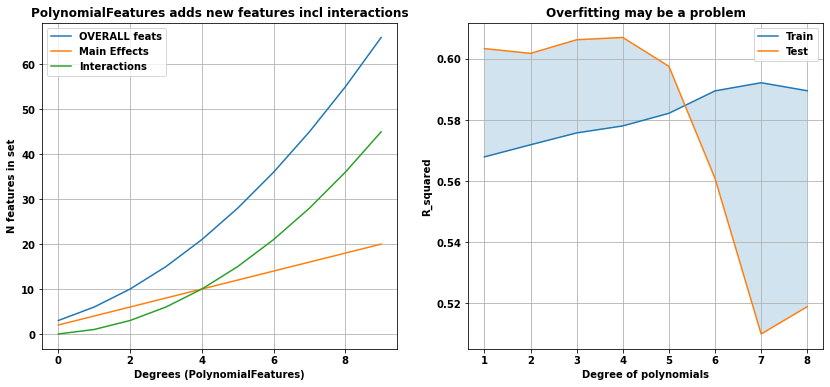


In this example, polynomials did not help and just introduced issues (overfitting). Note however that features were not normalized (= specifics unclear to me) and no regularization was used

eFor more details: https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/


In [45]:
print('*PolynomialFeatures* works well with linear regression models (LogisticReg, LinearReg), but it is recommended to keep the degrees below 4.')
print('\nWHAT IT DOES: In addition to the original features (= pow(x,1)) several new features will be created that include higher order terms (= pow(x,1:nDegrees)) and INTERACTIONS between these original and newly added features.')
print('\nADVANTAGE: capturing interactions. DISADVANTAGE: Feature explosion')
print('For example, here, we initially had 2 predictors (crime data)')
# use 2 best vars
X = crime[['PctKidsBornNeverMar', 'PctKids2Par']]
Y = crime[crime.columns[-1]]

from sklearn.preprocessing import PolynomialFeatures

nFeats_UR = np.shape(X)[1]
nFeats =[]
degRange = range(1,11)
for degr in degRange:
    X_poly = PolynomialFeatures(degree=degr).fit_transform(X)
    nFeats_NEW_ALL = np.shape(X_poly)[1] 
    nFeats_NEW_MainFx = degr*nFeats_UR 
    nFeats_NEW_Interactions = nFeats_NEW_ALL - nFeats_NEW_MainFx - 1
    nFeats.extend([[nFeats_NEW_ALL, nFeats_NEW_MainFx, nFeats_NEW_Interactions]])

fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].plot(nFeats)
ax[0].legend(['OVERALL feats','Main Effects','Interactions']); 
ax[0].set_title('PolynomialFeatures adds new features incl interactions'); 
ax[0].grid()
ax[0].set_ylabel('N features in set'); ax[0].set_xlabel('Degrees (PolynomialFeatures)')

resTrain=[]; resTest=[]
degRange = range(1,9)
for degr in degRange:
    X_poly = PolynomialFeatures(degree=degr).fit_transform(X)   
    xTrain, xTest, yTrain, yTest = train_test_split(X_poly,Y, random_state=0)
    temp = LinearRegression().fit(xTrain, yTrain)
    #temp = Lasso(alpha=20, max_iter=10000).fit(xTrain, yTrain)
    resTrain.append(temp.score(xTrain, yTrain))    
    resTest.append(temp.score(xTest, yTest))

ax[1].plot(degRange, resTrain, label = 'Train')
ax[1].plot(degRange, resTest, label = 'Test')
ax[1].fill_between(degRange,resTrain, resTest, alpha=.2)
ax[1].legend(); ax[1].grid(); ax[1].set_title('Overfitting may be a problem')
ax[1].set_xlabel('Degree of polynomials'); ax[1].set_ylabel('R_squared')
plt.show()

print('\nIn this example, polynomials did not help and just introduced issues (overfitting). Note however that features were not normalized (= specifics unclear to me) and no regularization was used')
print('\neFor more details: https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/')

# LogisticRegression

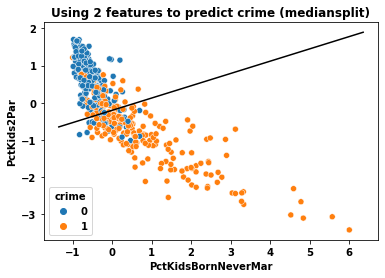


LogReg Classifier VS linear kernel SVM: Using 2 best predictors

LogisticRegression: acc TRAIN = 0.801 | TEST = 0.826
SVM Classifier (linear kernel): Accuracy TRAIN = 0.801 | TEST = 0.828
Note: Use regularized LR / SVC for many features. The reg parameter is C (smaller values = STRONGER regularization!)

LogReg Classifier VS linear kernel SVM: Using 88 predictors (not regularized)

LogisticRegression Classifier: Accuracy TRAIN = 0.859 | TEST = 0.848
SVM Classifier (linear kernel): Accuracy TRAIN = 0.856 | TEST = 0.838


In [46]:
feats = ['PctKidsBornNeverMar', 'PctKids2Par']
X = crime[feats]
Y = crime[crime.columns[-1]]
Y = np.where(Y < np.median(Y),0,1)
xTrain, xTest, yTrain, yTest = train_test_split(X,Y, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(xTrain)
xTrain = scaler.transform(xTrain)
xTest = scaler.transform(xTest)

tDF = pd.DataFrame(data=xTest, columns=feats)
tDF['crime'] = yTest

from sklearn.linear_model import LogisticRegression
LN = LogisticRegression(max_iter = 10000).fit(xTrain, yTrain)

# calculate boundary
x2 = list(LN.intercept_)[0] / list(LN.coef_)[0][1] # where x1 = 0
x1 = list(LN.intercept_)[0] / list(LN.coef_)[0][0] # where x2 = 0

#plt.plot([0, x1], [x2, 0], 'k-')
g = sns.scatterplot(data=tDF, x=feats[0], y = feats[1], hue='crime')
a = g.get_xlim()
plt.plot(a, [x1*a[0], x1*a[1]] + x2, 'k-')
plt.title('Using 2 features to predict crime (mediansplit)'); plt.show()

print('\nLogReg Classifier VS linear kernel SVM: Using 2 best predictors')
print('\nLogisticRegression: acc TRAIN = {} | TEST = {}'.format(np.round(LN.score(xTrain, yTrain),3), np.round(LN.score(xTest, yTest),3)))
from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(xTrain, yTrain)
print('SVM Classifier (linear kernel): Accuracy TRAIN = {} | TEST = {}'.format(round(svc.score(xTrain, yTrain),3), round(svc.score(xTest, yTest),3)))
print('Note: Use regularized LR / SVC for many features. The reg parameter is C (smaller values = STRONGER regularization!)')

#--------------------
print('\nLogReg Classifier VS linear kernel SVM: Using 88 predictors (not regularized)')
X = crime[crime.columns[:-1]]
Y = crime[crime.columns[-1]]
Y = np.where(Y < np.median(Y),0,1)
xTrain, xTest, yTrain, yTest = train_test_split(X,Y, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(xTrain)
xTrain = scaler.transform(xTrain)
xTest = scaler.transform(xTest)

LN = LogisticRegression(max_iter=10000).fit(xTrain, yTrain)
print('\nLogisticRegression Classifier: Accuracy TRAIN = {} | TEST = {}'.format(round(LN.score(xTrain, yTrain),3), round(LN.score(xTest, yTest),3)))
svc = SVC(kernel='linear').fit(xTrain, yTrain)
print('SVM Classifier (linear kernel): Accuracy TRAIN = {} | TEST = {}'.format(round(svc.score(xTrain, yTrain),3), round(svc.score(xTest, yTest),3)))

__multi-Category classification__

C:\Users\s01tk9\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


MultiClass classification (C=5):
Linear SVC accuracy TRAIN = 0.75 | TEST = 0.47
LogisticRegression TRAIN = 0.84 | TEST = 0.67


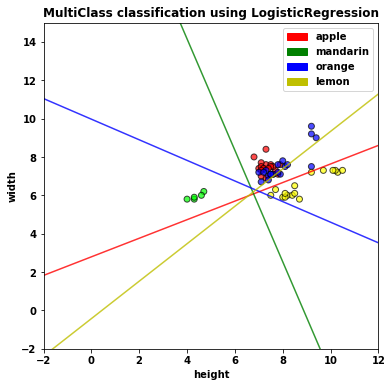

In [47]:
fruits = pd.read_table(r'https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/fruit_data_with_colors.txt')
IVs = ['height', 'width']
DV = ['fruit_label']

X = fruits[IVs]
Y = fruits[DV]
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

xTrain, xTest, yTrain, yTest = train_test_split(X,Y.values.ravel(), random_state=0)
from sklearn.svm import LinearSVC
clf = LinearSVC(C=5, random_state=0,max_iter = 10000).fit(xTrain, yTrain)    # Note the random_state parameter in here
print('MultiClass classification (C=5):\nLinear SVC accuracy TRAIN = {:.2f} | TEST = {:.2f}'
      .format(clf.score(xTrain, yTrain), clf.score(xTest, yTest)))
clf = LogisticRegression(C=5,max_iter = 10000).fit(xTrain, yTrain)
print('LogisticRegression TRAIN = {:.2f} | TEST = {:.2f}'
      .format(clf.score(xTrain, yTrain), clf.score(xTest, yTest)))

from matplotlib.colors import ListedColormap
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X[['height']], X[['width']],
            c=Y.values, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
    import matplotlib.patches as mpatches
legend_handles=[]
for i in range(0, len(target_names_fruits)):
    patch = mpatches.Patch(color=colors[i], label=target_names_fruits[i])
    legend_handles.append(patch)
plt.legend(loc=0, handles=legend_handles)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.title('MultiClass classification using LogisticRegression'); plt.show(); 

In [48]:
fruits = pd.read_table(r'https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/fruit_data_with_colors.txt')
IVs = ['mass', 'width', 'height', 'color_score']
DV = ['fruit_label']
X = fruits[IVs]
Y = fruits[DV]

xTrain, xTest, yTrain, yTest = train_test_split(X,Y.values.ravel(), random_state=0)
clf = LogisticRegression(C=1,max_iter = 10000).fit(xTrain, yTrain)
print('MultiClass classification (C=5) - does it help to include INTERACTIONS?\nLogisticRegression with 4 standard features TRAIN = {} | TEST = {}'
      .format(round(clf.score(xTrain, yTrain),3), round(clf.score(xTest, yTest),3)))

X_poly = PolynomialFeatures(degree=2).fit_transform(X)   
xTrain, xTest, yTrain, yTest = train_test_split(X_poly,Y.values.ravel(), random_state=0)
clf = LogisticRegression(C=1,max_iter = 10000).fit(xTrain, yTrain)
print('LogisticRegression with 2nd order polynomial (15 features) TRAIN = {} | TEST = {}'
      .format(round(clf.score(xTrain, yTrain),3), round(clf.score(xTest, yTest),3)))

MultiClass classification (C=5) - does it help to include INTERACTIONS?
LogisticRegression with 4 standard features TRAIN = 0.818 | TEST = 0.467
LogisticRegression with 2nd order polynomial (15 features) TRAIN = 0.886 | TEST = 0.533


# Kernelized Support Vector Machines (SVMs)
__Using NON-LINEAR kernels__  

In [49]:
print('WHAT IS A KERNEL? It is a measure of similiarity (modified dot product) between data points')
print('\nWhile SVMs are essentially LINEAR regression/classification methods, it is possible to use non-linear kernels that add new dimensions/features. This leads to a new feature space, similar to using polynomial features. In fact, there are polynomial kernel functions. The standard is a radial basis function (RBF, ie a GAUSSIAN)')

fruits = pd.read_table(r'https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/fruit_data_with_colors.txt')
IVs = ['mass', 'color_score']
DV = ['fruit_label']
X = fruits[IVs]
Y = fruits[DV]

xTrain, xTest, yTrain, yTest = train_test_split(X,Y.values.ravel(), random_state=0)
scaler = StandardScaler().fit(xTrain)
xTrain = scaler.transform(xTrain)
xTest = scaler.transform(xTest)
#clf = SVC(kernel = 'rbf', gamma = .5, C=1).fit(xTrain, yTrain)
clf = SVC().fit(xTrain, yTrain)

print('\nFRUITS example: MultiClass classification (standard params,normalized feats, 4 labels):\nSVC with radial basis function TRAIN = {} | TEST = {}'
      .format(round(clf.score(xTrain, yTrain),3), round(clf.score(xTest, yTest),3)))

temp = LogisticRegression().fit(xTrain, yTrain)
print('LogisticRegression TRAIN = {} | TEST = {}'
      .format(round(temp.score(xTrain, yTrain),3), round(temp.score(xTest, yTest),3)))

WHAT IS A KERNEL? It is a measure of similiarity (modified dot product) between data points

While SVMs are essentially LINEAR regression/classification methods, it is possible to use non-linear kernels that add new dimensions/features. This leads to a new feature space, similar to using polynomial features. In fact, there are polynomial kernel functions. The standard is a radial basis function (RBF, ie a GAUSSIAN)

FRUITS example: MultiClass classification (standard params,normalized feats, 4 labels):
SVC with radial basis function TRAIN = 0.841 | TEST = 0.733
LogisticRegression TRAIN = 0.591 | TEST = 0.333


Decision boundary for SVC with RBF - fruits example
SVC with RBF, GAMMA = .5 & C=1, TRAIN = 0.841 | TEST = 0.733


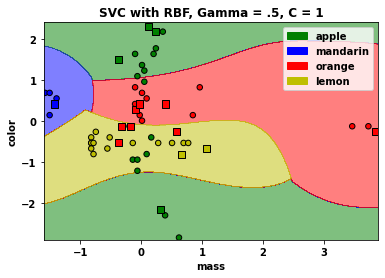

SVC with RBF, GAMMA = 2 & C=1, TRAIN = 0.977 | TEST = 0.867


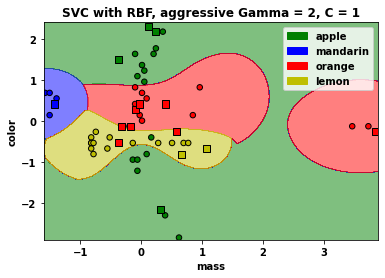

SVC with RBF, GAMMA = 0.5 & C=.2, TRAIN = 0.545 | TEST = 0.4


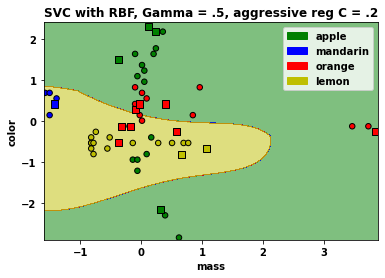

In [50]:
print('Decision boundary for SVC with RBF - fruits example')

def plotBoundaries_TK(clf, xTrain, yTrain, xTest,yTest):
    colList = ['g', 'b', 'r', 'y']
    cmap = ListedColormap(colList)
    fruitlabels = ['apple', 'mandarin', 'orange', 'lemon']   
    # get axLims
    a = np.concatenate((xTrain, xTest), axis=0)
    axLims = [np.floor(a.min(axis=0)*10)/10, np.ceil(a.max(axis=0)*10)/10]
    axLims = [axLims[0][0], axLims[1][0], axLims[0][1], axLims[1][1]]
    # mesh
    xv, yv = np.meshgrid(np.linspace(axLims[0], axLims[1], 1000), np.linspace(axLims[2], axLims[3], 1000))
    Z = clf.predict(np.c_[xv.ravel(), yv.ravel()])
    Z = np.reshape(Z, np.shape(xv))
    # plot
    plt.contourf(xv,yv,Z, cmap=cmap, alpha=.5)
    plt.scatter(xTrain[:,0], xTrain[:,1],30, c=yTrain, cmap=cmap, edgecolor = 'black')
    plt.scatter(xTest[:,0], xTest[:,1], 50, c=yTest, marker='s', cmap=cmap, edgecolor = 'black')
    plt.xlabel('mass'); plt.ylabel('color')
    #legend
    import matplotlib.patches as mpatches
    legend_handles=[]
    for i in range(0, len(fruitlabels)):
        patch = mpatches.Patch(color=colList[i], label=fruitlabels[i])
        legend_handles.append(patch)
    plt.legend(loc=0, handles=legend_handles)
    

clf = SVC(kernel = 'rbf', gamma = .5, C=1).fit(xTrain, yTrain)
print('SVC with RBF, GAMMA = .5 & C=1, TRAIN = {} | TEST = {}'
      .format(round(clf.score(xTrain, yTrain),3), round(clf.score(xTest, yTest),3)))
plotBoundaries_TK(clf, xTrain, yTrain, xTest,yTest); plt.title('SVC with RBF, Gamma = .5, C = 1'); plt.show()

clf = SVC(kernel = 'rbf', gamma = 2, C = 1).fit(xTrain, yTrain)
print('SVC with RBF, GAMMA = 2 & C=1, TRAIN = {} | TEST = {}'
      .format(round(clf.score(xTrain, yTrain),3), round(clf.score(xTest, yTest),3)))
plotBoundaries_TK(clf, xTrain, yTrain, xTest,yTest); plt.title('SVC with RBF, aggressive Gamma = 2, C = 1'); plt.show()

clf = SVC(kernel = 'rbf', gamma = .5, C = .2).fit(xTrain, yTrain)
print('SVC with RBF, GAMMA = 0.5 & C=.2, TRAIN = {} | TEST = {}'
      .format(round(clf.score(xTrain, yTrain),3), round(clf.score(xTest, yTest),3)))
plotBoundaries_TK(clf, xTrain, yTrain, xTest,yTest); plt.title('SVC with RBF, Gamma = .5, aggressive reg C = .2'); plt.show()


REGRESSION: It is possible to use SVM to predict continuous labels. Here, fruits example, just for fun
SVR TRAIN = 0.82 | TEST = 0.773


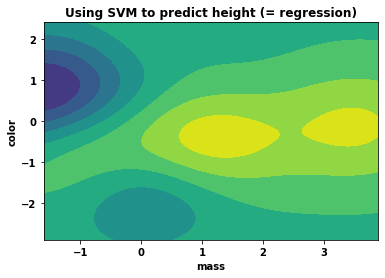

In [51]:
print('REGRESSION: It is possible to use SVM to predict continuous labels. Here, fruits example, just for fun')
from sklearn.svm import SVR
IVs = ['mass', 'color_score']
DV = ['height']
X = fruits[IVs]
Y = fruits[DV]
xTrain, xTest, yTrain, yTest = train_test_split(X,Y.values.ravel(), random_state=0)
scaler = StandardScaler().fit(xTrain)
xTrain = scaler.transform(xTrain)
xTest = scaler.transform(xTest)
clf = SVR(kernel = 'rbf').fit(xTrain, yTrain)
print('SVR TRAIN = {} | TEST = {}'
      .format(round(clf.score(xTrain, yTrain),3), round(clf.score(xTest, yTest),3)))

# Simplified plot, JUST FOR FUN
a = np.concatenate((xTrain, xTest), axis=0)
axLims = [np.floor(a.min(axis=0)*10)/10, np.ceil(a.max(axis=0)*10)/10]
axLims = [axLims[0][0], axLims[1][0], axLims[0][1], axLims[1][1]]
xv, yv = np.meshgrid(np.linspace(axLims[0], axLims[1], 1000), np.linspace(axLims[2], axLims[3], 1000))
Z = clf.predict(np.c_[xv.ravel(), yv.ravel()])
Z = np.reshape(Z, np.shape(xv))
plt.contourf(xv,yv,Z);
plt.xlabel('mass'); plt.ylabel('color'); plt.title('Using SVM to predict height (= regression)');

# K-fold CrossValidation

In [52]:
print('K-FOLD: *cross_val_score* uses all data for test & training purposes (unlike *train_test_split*). The function uses as arguments the classifier, the predictors and criterion. STRATIFIED KFolds balances the criterion labels per split. It is useful if the sample size is small and some labels are infrequent. Use a PIPELINE if it is required to NORMALIZE the predictors before each split. The pipe requires a Scaler and Estimator; the Splitter can be passed directly to *cross_val_score*.\nhttps://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html')

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

IVs = ['mass', 'color_score']
DV = ['fruit_label']
X = fruits[IVs]
Y = fruits[DV]

clf = SVC()
cv = KFold(n_splits = 3)
a = cross_val_score(clf,X,Y.values.ravel(), cv=cv) # default is 5-fold - passing an integer uses a STRATIFIED splitter
print('\n{}-fold cross-Validation without Scaler, mean score = {:.3f}'.format(len(a), a.mean()))
print('All scores: ', a)

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits = 3)
a = cross_val_score(clf,X,Y.values.ravel(), cv=cv) # default is 5-fold - passing an integer uses a STRATIFIED splitter
print('\n{}-fold STRATIFIED cross-Validation without Scaler, mean score = {:.3f}'.format(len(a), a.mean()))
print('All scores: ', a)

from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

scaler = StandardScaler()
clf = SVC()
pipe = Pipeline([('transformer', scaler), ('estimator', clf)])

cv = StratifiedKFold(n_splits=3)
a = cross_val_score(pipe, X, Y.values.ravel(), cv = cv)
print('\n{}-fold STRATIFIED cross-Validation in a PIPE with Scaler, mean score = {:.3f}'.format(len(a), a.mean()))
print('All scores: ', a)

K-FOLD: *cross_val_score* uses all data for test & training purposes (unlike *train_test_split*). The function uses as arguments the classifier, the predictors and criterion. STRATIFIED KFolds balances the criterion labels per split. It is useful if the sample size is small and some labels are infrequent. Use a PIPELINE if it is required to NORMALIZE the predictors before each split. The pipe requires a Scaler and Estimator; the Splitter can be passed directly to *cross_val_score*.
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

3-fold cross-Validation without Scaler, mean score = 0.050
All scores:  [0.   0.15 0.  ]

3-fold STRATIFIED cross-Validation without Scaler, mean score = 0.305
All scores:  [0.3        0.3        0.31578947]

3-fold STRATIFIED cross-Validation in a PIPE with Scaler, mean score = 0.696
All scores:  [0.7        0.6        0.78947368]


Cross-Validation curves are meant for model evaluation (not optimization)


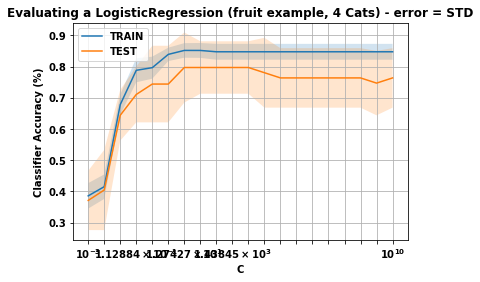

In [53]:
print('Cross-Validation curves are meant for model evaluation (not optimization)')
from sklearn.model_selection import validation_curve
fruits = pd.read_table(r'https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/fruit_data_with_colors.txt')
IVs = ['height', 'width']
DV = ['fruit_label']

X = fruits[IVs]
Y = fruits[DV]

Crange = np.logspace(-3, 10,20)
trainS, testS = validation_curve(LogisticRegression(max_iter = 10000), X, Y.values.ravel(), 
                                         param_name = 'C', 
                                         param_range = Crange)

g = sns.lineplot(x=Crange, y=np.mean(trainS, axis=1), label='TRAIN')
g = sns.lineplot(x=Crange, y=np.mean(testS, axis=1), label='TEST')
plt.fill_between(Crange, np.mean(trainS,axis=1) + np.std(trainS,axis=1),
                         np.mean(trainS,axis=1) - np.std(trainS,axis=1), alpha=0.2)
plt.fill_between(Crange, np.mean(testS,axis=1) + np.std(testS,axis=1),
                         np.mean(testS,axis=1) - np.std(testS,axis=1), alpha=0.2)
g.set(xscale='log')
g.set(xticks=Crange)
g.set_xlabel('C')
g.set_ylabel('Classifier Accuracy (%)')
plt.title('Evaluating a LogisticRegression (fruit example, 4 Cats) - error = STD'); plt.grid();

# Decision Trees
__Classifier & Regression. PRO: Easy to interpret (see also feat importance), no need to normalize feats, works for mixed feat data scales. CONTRA: Overfit/Generalizability. TUNE: tune parameters (max_depth, max_leaf_nodes, min_samples_leaf) and use DecisionTreeFORESTs__ 

DecisionTreeClassifier with standard setings, fruits example - still some overfitting.
Accuracy TRAIN = 1.000 | TEST = 0.733


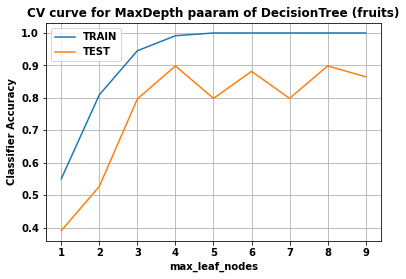

In [54]:
from sklearn.tree import DecisionTreeClassifier
fruits = pd.read_table(r'https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/fruit_data_with_colors.txt')
IVs = ['mass', 'height', 'width', 'color_score']
DV = ['fruit_label']

X = fruits[IVs]
Y = fruits[DV]
xTrain, xTest, yTrain, yTest = train_test_split(X,Y, random_state=0)

clf = DecisionTreeClassifier().fit(xTrain, yTrain)
print('DecisionTreeClassifier with standard setings, fruits example - still some overfitting.')
print('Accuracy TRAIN = {:.3f} | TEST = {:.3f}'.format(clf.score(xTrain, yTrain), clf.score(xTest, yTest)))

dRange = range(1,10)
trainS, testS = validation_curve(clf, X, Y, 
                                         param_name = 'max_depth', #'max_depth' 
                                         param_range = dRange)

plt.plot(dRange, np.mean(trainS,axis=1), label='TRAIN')
plt.plot(dRange, np.mean(testS,axis=1), label='TEST'); 
plt.xlabel('max_leaf_nodes'); plt.ylabel('Classifier Accuracy'); plt.legend(); plt.title('CV curve for MaxDepth paaram of DecisionTree (fruits)'); plt.grid();

Visualising DecisionTrees can be visualized per Text Tree:

|--- height <= 7.95
|   |--- width <= 7.35
|   |   |--- class: 3
|   |--- width >  7.35
|   |   |--- class: 1
|--- height >  7.95
|   |--- color_score <= 0.75
|   |   |--- class: 4
|   |--- color_score >  0.75
|   |   |--- class: 3


 ... or graphically


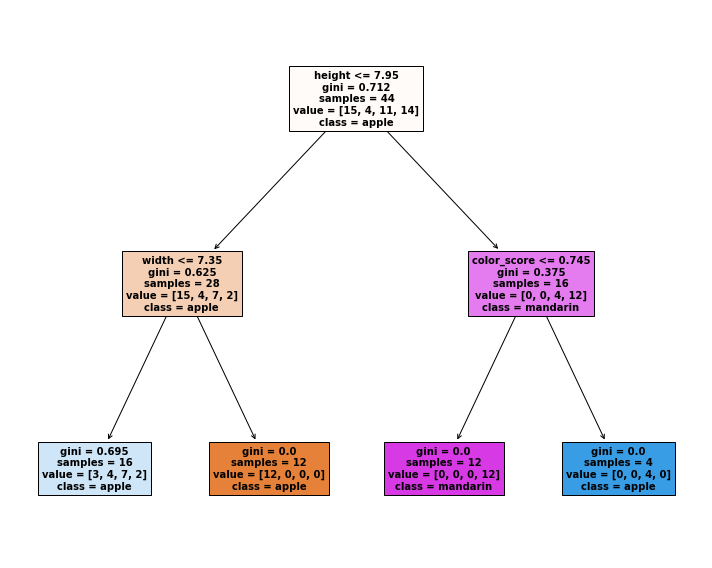

In [55]:
IVs = ['mass', 'height', 'width', 'color_score']
DV = ['fruit_label']
X = fruits[IVs]
Y = fruits[DV]
xTrain, xTest, yTrain, yTest = train_test_split(X,Y, random_state=0)
clf = DecisionTreeClassifier(max_depth = 2).fit(xTrain, yTrain)

print('Visualising DecisionTrees can be visualized per Text Tree:\n')
from sklearn import tree
text_representation = tree.export_text(clf, feature_names = IVs)
print(text_representation)

print('\n ... or graphically')
plt.figure(figsize=(10,8))
_ = tree.plot_tree(clf, feature_names = IVs, class_names = fruits.fruit_name, filled=True, fontsize=10)
plt.tight_layout()

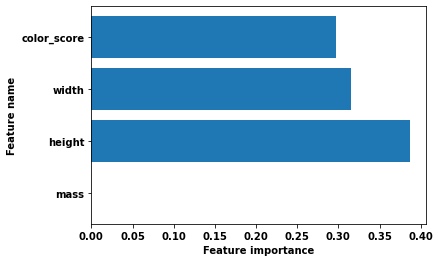

In [56]:
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

plot_feature_importances(clf, IVs)

EXAMPLE: CRIME (median split) with all 88 features
DecisionTreeClassifier with standard setings, crime example.
Accuracy TRAIN = 1.000 | TEST = 0.802


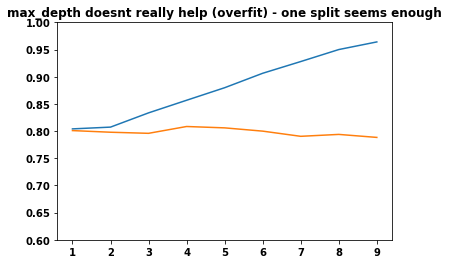

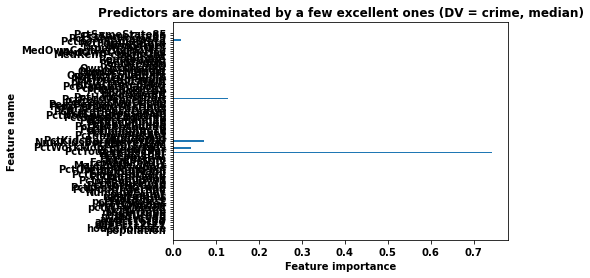

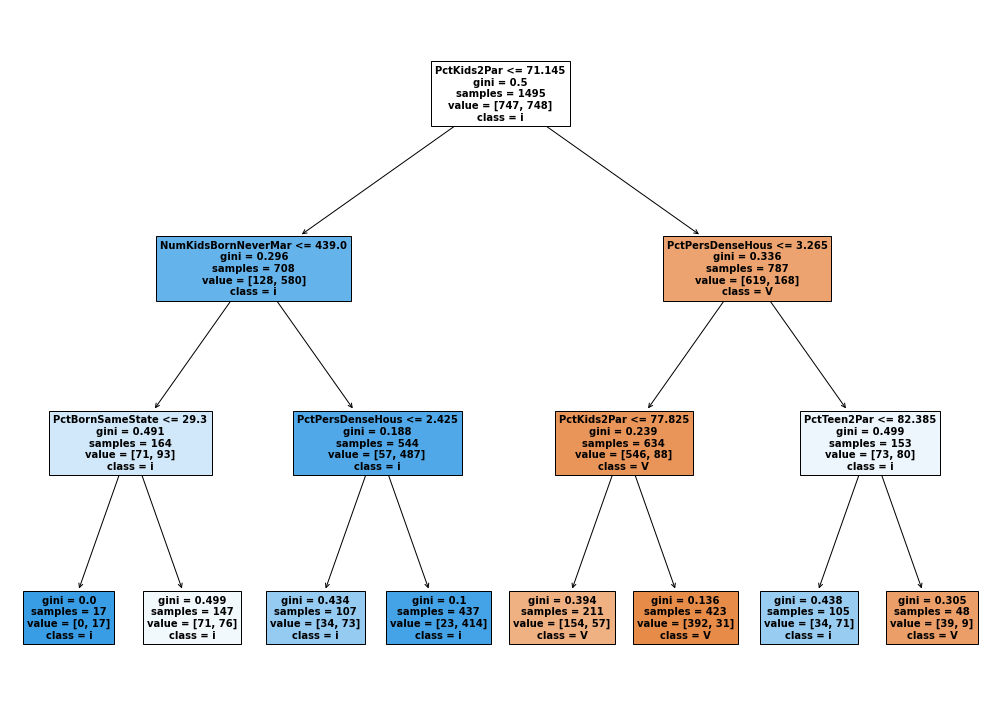

In [57]:
print('EXAMPLE: CRIME (median split) with all 88 features')
from sklearn.tree import DecisionTreeClassifier
X = crime[crime.columns[:-1]]
Y = crime[crime.columns[-1]]
Y = np.where(Y < np.median(Y),0,1)
xTrain, xTest, yTrain, yTest = train_test_split(X,Y, random_state=0)

clf = DecisionTreeClassifier().fit(xTrain, yTrain)
print('DecisionTreeClassifier with standard setings, crime example.')
print('Accuracy TRAIN = {:.3f} | TEST = {:.3f}'.format(clf.score(xTrain, yTrain), clf.score(xTest, yTest)))

dRange = range(1,10)
trainS, testS = validation_curve(clf, X, Y, 
                                         param_name = 'max_depth', #'max_depth' 
                                         param_range = dRange)

plt.plot(dRange, np.mean(trainS,axis=1));
plt.plot(dRange, np.mean(testS,axis=1));
plt.title('max_depth doesnt really help (overfit) - one split seems enough'); plt.ylim([.6, 1]); plt.show();

clf = DecisionTreeClassifier(max_depth=3).fit(xTrain, yTrain)
plot_feature_importances(clf, crime.columns[:-1]);
plt.title('Predictors are dominated by a few excellent ones (DV = crime, median)');

plt.figure(figsize=(14,10))
_ = tree.plot_tree(clf, feature_names = crime.columns[:-1], class_names = crime.columns[-1], filled=True, fontsize=10)
plt.tight_layout()

--------------------------
# WEEK 3 MODEL EVALUATION
__There are different criteria conceivable, of which some are "soft" (e.g. customer satisfaction). The following "hard" quantitative metrics are common:__
- Accuracy, precision, recall
- F1 Score
- Area under Curve (AUC)
--------------------------

# Null model (baserate)

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

print('CLASSIFICATION: use fruits example with criterion ORANGE vs no_ORANGE')
fruits = pd.read_table(r'https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/fruit_data_with_colors.txt')
IVs = ['height', 'width']
DV = ['fruit_label']
X = fruits[IVs]
Y = fruits[DV]
target_names = ['apple', 'mandarin', 'orange', 'lemon']
for urlabel, newlabel in zip(target_names, fruits[DV].value_counts(sort=False)): 
    print('{} n = {}'.format(urlabel,newlabel))

print('Recode LABEL: 1 = orange, 0 = no_orange\n')
Y = np.where(Y == 3, 1, 0) 
xTrain, xTest, yTrain, yTest = train_test_split(X,Y.ravel(), random_state=0)
print('NULL METRIC: Dummy classifier (or regressor) calculates BASERATE. Strategies differ for classifier vs regressor')

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10000).fit(xTrain, yTrain)
print('Classifier accuracy: TRAIN = {:.2f}, : TEST = {:.2f}'.format(clf.score(xTrain,yTrain), clf.score(xTest,yTest)))

from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = 'most_frequent').fit(xTrain, yTrain)
print('Dummy class. accuracy (using baserate): TRAIN = {:.2f}, : TEST = {:.2f}'.format(dummy.score(xTrain,yTrain), dummy.score(xTest,yTest)))
print('... considering the NULL MODEL, classifier performance is not very impressive')

CLASSIFICATION: use fruits example with criterion ORANGE vs no_ORANGE
apple n = 19
mandarin n = 5
orange n = 19
lemon n = 16
Recode LABEL: 1 = orange, 0 = no_orange

NULL METRIC: Dummy classifier (or regressor) calculates BASERATE. Strategies differ for classifier vs regressor
Classifier accuracy: TRAIN = 0.80, : TEST = 0.53
Dummy class. accuracy (using baserate): TRAIN = 0.75, : TEST = 0.47
... considering the NULL MODEL, classifier performance is not very impressive


In [59]:
print('REGRESSION: use fruits example with criterion ORANGE vs no_ORANGE')
IVs = ['height', 'width']
DV = ['mass']
X = fruits[IVs]
Y = fruits[DV]

xTrain, xTest, yTrain, yTest = train_test_split(X,Y, random_state=0)
print('NULL METRIC: Dummy classifier (or regressor) calculates BASERATE. Strategies differ for classifier vs regressor')

from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(xTrain, yTrain)
print('Classifier accuracy: TRAIN = {:.2f}, : TEST = {:.2f}'.format(clf.score(xTrain,yTrain), clf.score(xTest,yTest)))

from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy = 'mean').fit(xTrain, yTrain)
print('Dummy class. accuracy (using baserate): TRAIN = {:.2f}, : TEST = {:.2f}'.format(dummy.score(xTrain,yTrain), dummy.score(xTest,yTest)))

REGRESSION: use fruits example with criterion ORANGE vs no_ORANGE
NULL METRIC: Dummy classifier (or regressor) calculates BASERATE. Strategies differ for classifier vs regressor
Classifier accuracy: TRAIN = 0.85, : TEST = 0.85
Dummy class. accuracy (using baserate): TRAIN = 0.00, : TEST = -0.07


# Confusion matrix & Evaluation Metrics: Classification (discrete DV)
__a) TWO CLASSES (2 labels)__

Confusion Matrix: ACTUAL values are in the ROWs
PREDICTED values are in the COLUMNs

BINARY case: Oranges vs non-Oranges
Confusion Matrix CLASSIFIER:
 [[7 0]
 [7 1]]
Confusion Matrix DUMMY-Classifier:
 [[7 0]
 [8 0]]


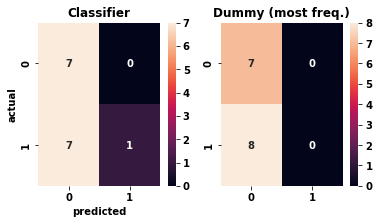


Basic metrics are ACCURACY, PRECISION, RECALL (aka Sensitivity, True Positive Rate), F1. To calculate them by hand use ... 
ACCURACY: Sum of diagonal divided by all cases = 0.53
PRECISION (focus on pos predictions): TruePos divided by sum of second COLUMN (= TP + FP)  = 1.00
RECALL (focus on pos values): TruePos divided by sum of second ROW (= TP + FN)  = 0.12
F1 score combines precision and recall: F1 = 0.22
note: F1 = precision * recall / (precision + recall), or: = 2*TP/(2*TP + FP + FN) -> (2*TP divided by 2*TP + anything but TN)

Lets replicate these figures using sklearn functions:
Accuracy = 0.53, precision = 1.00, recall = 0.12, F1 = 0.22


*classification_report* provides a quick summary with all these metrics
              precision    recall  f1-score   support

  not Orange       0.50      1.00      0.67         7
      Orange       1.00      0.12      0.22         8

    accuracy                           0.53        15
   macro avg       0.75      0.56      0.44        15

In [60]:
print('Confusion Matrix: ACTUAL values are in the ROWs\nPREDICTED values are in the COLUMNs')
print('\nBINARY case: Oranges vs non-Oranges')
IVs = ['height', 'width']
DV = ['fruit_label']
X = fruits[IVs]
Y = fruits[DV]
Y = np.where(Y == 3, 1, 0)  # recode: orange = 1, otherwise = 0

xTrain, xTest, yTrain, yTest = train_test_split(X,Y.ravel(), random_state=0)
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(xTrain); xTrain = scaler.transform(xTrain); xTest = scaler.transform(xTest)

clf = LogisticRegression(max_iter=10000).fit(xTrain, yTrain)
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(yTest, clf.predict(xTest))
print('Confusion Matrix CLASSIFIER:\n', confusion)

dummy = DummyClassifier(strategy = 'most_frequent').fit(xTrain, yTrain)
confusionD = confusion_matrix(yTest, dummy.predict(xTest))
print('Confusion Matrix DUMMY-Classifier:\n', confusionD)

# plot in heatmap
fig, ax = plt.subplots(1,2, figsize=(6,3))
sns.heatmap(confusion, annot=True,ax=ax[0])
sns.heatmap(confusionD, annot=True,ax=ax[1])
ax[0].set_xlabel('predicted'); ax[0].set_ylabel('actual'); 
ax[0].set_title('Classifier'); 
ax[1].set_title('Dummy (most freq.)'); plt.show()

print('\nBasic metrics are ACCURACY, PRECISION, RECALL (aka Sensitivity, True Positive Rate), F1. To calculate them by hand use ... ')
print('ACCURACY: Sum of diagonal divided by all cases = {:.2f}'.format(np.sum(np.diag(confusion)) / np.sum(confusion.reshape(-1,1))))
print('PRECISION (focus on pos predictions): TruePos divided by sum of second COLUMN (= TP + FP)  = {:.2f}'.format(confusion[1,1] / np.sum(confusion[:,1], axis=0)))
print('RECALL (focus on pos values): TruePos divided by sum of second ROW (= TP + FN)  = {:.2f}'.format(confusion[1,1] / np.sum(confusion[1,:], axis=0)))
print('F1 score combines precision and recall: F1 = {:.2f}\nnote: F1 = precision * recall / (precision + recall), or: = 2*TP/(2*TP + FP + FN) -> (2*TP divided by 2*TP + anything but TN)'.format(2*confusion[1,1] / (2*confusion[1,1] + confusion[0,1] + confusion[1,0])))
# PRECISION: MAKE SURE THAT IT IS THE REAL-DEAL (no fAs)
# RECALL: NO APPLE LEFT BEHIND

print('\nLets replicate these figures using sklearn functions:')
pred = clf.predict(xTest)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy = {:.2f}, precision = {:.2f}, recall = {:.2f}, F1 = {:.2f}'
      .format(accuracy_score(yTest, pred),
              precision_score(yTest, pred),
              recall_score(yTest, pred),
              f1_score(yTest, pred)))

print('\n\n*classification_report* provides a quick summary with all these metrics')
from sklearn.metrics import classification_report
print(classification_report(yTest, pred, target_names = ['not Orange', 'Orange']))

__b) MULTIPLE CLASSES (k labels)__

The MULTI-CLASS case is just an extension of the 2-CLASS scenario. The confusion matrix & metrics are essentially the same (see below for details on Macro vs Micro aves.)

Number of occurrences of  ('apple', 1)  is :  19
Number of occurrences of  ('mandarin', 2)  is :  5
Number of occurrences of  ('orange', 3)  is :  19
Number of occurrences of  ('lemon', 4)  is :  16

Confusion Matrix CLASSIFIER:
 [[4 0 0 0]
 [0 1 0 0]
 [4 0 4 0]
 [0 0 0 2]]


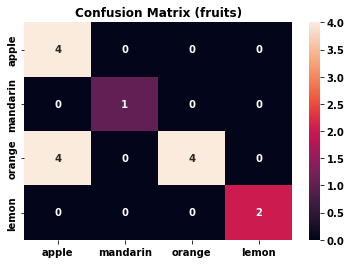

Classifier Accuracy = 0.73
With multiple categories, there are different ways to calculate the metrics.
MACRO || Precision = 0.88, recall = 0.88, F1 = 0.83
MICRO || Precision = 0.73, recall = 0.73, F1 = 0.73
WEIGHTED || Precision = 0.87, recall = 0.73, F1 = 0.73

Here is the summary:
              precision    recall  f1-score   support

       apple       0.50      1.00      0.67         4
    mandarin       1.00      1.00      1.00         1
      orange       1.00      0.50      0.67         8
       lemon       1.00      1.00      1.00         2

    accuracy                           0.73        15
   macro avg       0.88      0.88      0.83        15
weighted avg       0.87      0.73      0.73        15


INTERPRETATION
MACRO = calculate performance for each class, then average across classes -> biases small categories (little support)
MICRO = calculate performance for each item, average across items -> biases large categories (much support)
WEIGHTED = calculate performance for e

In [61]:
print('The MULTI-CLASS case is just an extension of the 2-CLASS scenario. The confusion matrix & metrics are essentially the same (see below for details on Macro vs Micro aves.)\n')
IVs = ['height', 'width']
DV = ['fruit_label']
X = fruits[IVs]
Y = fruits[DV]

from collections import Counter
frequency = Counter(zip(fruits.fruit_name, fruits.fruit_label))
for (key, value) in frequency.items():
    print("Number of occurrences of ", key, " is : ", value)
targetDict = {'apple': 1, 'mandarin': 2, 'orange': 3, 'lemon': 4}

# split, scale, fit_classifier
xTrain, xTest, yTrain, yTest = train_test_split(X,Y.values.ravel(), random_state=0)
scaler = StandardScaler().fit(xTrain); xTrain = scaler.transform(xTrain); xTest = scaler.transform(xTest)
clf = LogisticRegression(max_iter=10000).fit(xTrain, yTrain)

confusion = confusion_matrix(yTest, clf.predict(xTest))
print('\nConfusion Matrix CLASSIFIER:\n', confusion)

# plot in heatmap
df_cm = pd.DataFrame(confusion, index = list(targetDict.keys()), columns = list(targetDict.keys()))
sns.heatmap(df_cm, annot=True); plt.title('Confusion Matrix (fruits)'); plt.show();

pred = clf.predict(xTest)
print('Classifier Accuracy = {:.2f}'.format(accuracy_score(yTest, pred)))                  
print('With multiple categories, there are different ways to calculate the metrics.')
calcHow = ['macro', 'micro', 'weighted']
for item in calcHow:
    print(item.upper() + ' || Precision = {:.2f}, recall = {:.2f}, F1 = {:.2f}'
          .format(precision_score(yTest, pred, average=item),
                  recall_score(yTest, pred, average=item),
                  f1_score(yTest, pred, average=item)))
    
print('\nHere is the summary:')    
print(classification_report(yTest, pred, target_names = list(targetDict.keys())))

print('\nINTERPRETATION')
print('MACRO = calculate performance for each class, then average across classes -> biases small categories (little support)')
print('MICRO = calculate performance for each item, average across items -> biases large categories (much support)')
print('WEIGHTED = calculate performance for each classe, average across classes weighted by support')
print('NOTE: If performance MACRO > MICRO, the classifier struggles with the major classes. If MACRO < MICRO, it struggles with the small classes.')

# Evaluation metrics for regression (continuous DV)
__Metrics for Classifier performance: R_sq and Mean_Squared_Error (MSE)__

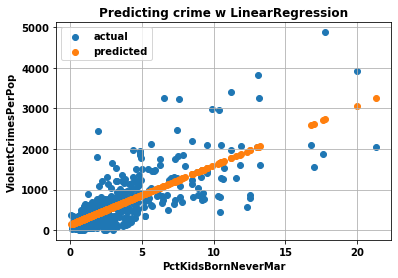

EVALUATION METRICS for crime example with a single predictor
Mean Squared Error (MSE) = 174762.40
R_sq = 0.57


In [62]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
X = crime['PctKidsBornNeverMar']; Y = crime[crime.columns[-1]]; xTrain, xTest, yTrain, yTest = train_test_split(X.values,Y.values, random_state=0)
#reg = LinearRegression().fit(xTrain.reshape(-1,1), yTrain)
reg = LinearRegression().fit(xTrain.reshape(-1,1), yTrain)

ypred = reg.predict(xTest.reshape(-1,1))
plt.scatter(xTest, yTest, label='actual')
plt.scatter(xTest, ypred, label='predicted')
plt.legend(); plt.xlabel('PctKidsBornNeverMar'); plt.ylabel('ViolentCrimesPerPop'); plt.grid(); plt.title('Predicting crime w LinearRegression'); plt.show();

print('EVALUATION METRICS for crime example with a single predictor\nMean Squared Error (MSE) = {:.2f}\nR_sq = {:.2f}'.format(
    mean_squared_error(yTest, ypred),
    r2_score(yTest, ypred)))

# Decision Thresholds & Decision functions
__For each data point, classifiers output a CLASSIFIER SCORE in a specific metric. The DECISION THRESHOLD is a cut off that determines to which class the sample is assigned to. Additionally, classifiers report the CONFIDENCE of their prediction (via a p-score that the sample belongs to category X).__

__CLASSIFICATION RULES depend on the choice of decision threshold and affect classifier performance. Sweeping through a range of thresholds produces the classifiers DECISION FUNCTION. They can be visualized using precision/recall or ROC curves__
- eg *Predict_proba* (probability of choosing class 1 over 0, default 50% -> higher values = more conservative) or *Decision_Function*
- LOW threshold: low precision, high recall
- HIGH threshold: high precision, low recall 

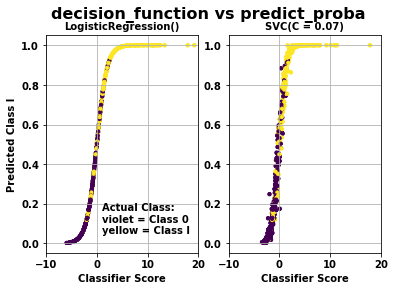

In [63]:
crime = pd.read_table(r"https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/CommViolPredUnnormalizedData.txt", sep=',', na_values='?')
columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
crime = crime[crime.columns[columns_to_keep]].dropna()
X = crime[crime.columns[:-1]]
Y = crime[crime.columns[-1]]
Y = np.where(Y < np.median(Y),0,1)
xTrain, xTest, yTrain, yTest = train_test_split(X,Y.ravel(), random_state=0)
#Normalize feats
scaler = StandardScaler().fit(xTrain); 
xTrain = scaler.transform(xTrain); 
xTest = scaler.transform(xTest)
# -------------------------------------------
clf = LogisticRegression(max_iter=10000).fit(xTrain, yTrain)
sLR = clf.decision_function(xTest)
pLR = clf.predict_proba(xTest)
svc = SVC(probability = True, max_iter=10000, kernel = 'linear', C=.07).fit(xTrain, yTrain)
sSVC = svc.decision_function(xTest)
pSVC = svc.predict_proba(xTest)

fig, ax = plt.subplots(1,2, figsize=(6,4));
ax[0].scatter(sLR, pLR[:,1], 10, c= yTest, label='actual');
ax[0].scatter(sLR, pLR[:,1], 10, c= yTest, label='actual');
ax[0].set_xlim([-10, 20]); ax[0].set_xlabel('Classifier Score'); ax[0].set_ylabel('Predicted Class I'); ax[0].set_title('LogisticRegression()', fontsize=10); ax[0].grid();
ax[1].scatter(sSVC, pLR[:,1], 10, c= yTest, label='actual');
ax[1].scatter(sSVC, pLR[:,1], 10, c= yTest, label='actual');
ax[1].set_xlim([-10, 20]); ax[1].set_xlabel('Classifier Score'); ax[1].set_title('SVC(C = 0.07)', fontsize=10); ax[1].grid();
ax[0].annotate('Actual Class:\nviolet = Class 0\nyellow = Class I', xy=(1, .05));
fig.suptitle('decision_function vs predict_proba', fontsize=16);

__Precision - Recall curve__

With default settings, the LogisticRegr classifier has a precision = 0.84 and a recall = 0.85

*precision_recall_curve* returns PRECISION & RECALL scores depending on the cut-off (threshold at N-th sample)
Precision - recall curve with 10% threshold bins



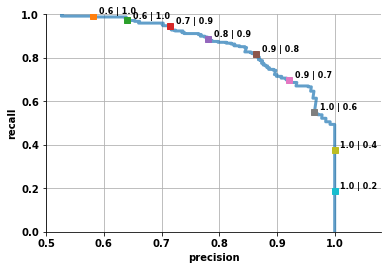

In [64]:
X = crime[crime.columns[:-1]]
Y = crime[crime.columns[-1]]
Y = np.where(Y < np.median(Y),0,1)
xTrain, xTest, yTrain, yTest = train_test_split(X,Y.ravel(), random_state=0)
scaler = StandardScaler().fit(xTrain);  xTrain = scaler.transform(xTrain); xTest = scaler.transform(xTest)

clf = LogisticRegression(max_iter=10000).fit(xTrain, yTrain)
yDF = clf.decision_function(xTest)
ypred = clf.predict(xTest)
print('With default settings, the LogisticRegr classifier has a precision = {:.2f} and a recall = {:.2f}'.format(precision_score(yTest, ypred), recall_score(yTest, ypred)))

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(yTest, yDF)
plt.plot(precision,recall, alpha=0.7,lw=3)
# range of thresholds: segment in 10% bins
perc10_inds = np.round(np.arange(0, 472, len(thresholds)/10))
for t in perc10_inds[1:]:
    plt.plot(precision[int(t)],recall[int(t)], marker='s')
    plt.annotate('{:.1f} | {:.1f}'.format(precision[int(t)],recall[int(t)]), xy = [.01+precision[int(t)],.01+recall[int(t)]], fontsize=8)
plt.xlim([.5,1.08]); 
plt.ylim([0,1]); sns.despine(); plt.grid(); #plt.title('Precision vs Recall Curve')
plt.xlabel('precision'); plt.ylabel('recall');
print('\n*precision_recall_curve* returns PRECISION & RECALL scores depending on the cut-off (threshold at N-th sample)')
print('Precision - recall curve with 10% threshold bins\n')


__Receiver - Operator Characteristic (ROC)__

ROCs focus on POSITIVE predictions. They plot false vs true positive (fAs vs Hits on x vs y axis).

Comparing the ROCs and Area Under the Curve (AUC) for 4 parameter settings (C) of a logistic regression. Note that C values around 1 are fine, whereas strong and lax regularization result in high bias (underfit) and high variance (overfit), respectively.


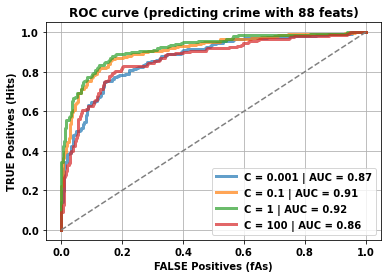

In [65]:
print('ROCs focus on POSITIVE predictions. They plot false vs true positive (fAs vs Hits on x vs y axis).')
from sklearn.metrics import roc_curve, auc
cRange = [.001, 0.1, 1, 100]
for c in cRange:
    clf = SVC(C = c, max_iter=10000).fit(xTrain, yTrain)
    decFx = clf.decision_function(xTest)    
    fp, tp, _ = roc_curve(yTest, decFx)
    roc_auc = auc(fp, tp)
    plt.plot(fp, tp, lw=3, alpha=0.7, label = 'C = {:} | AUC = {:.2f}'.format(c, roc_auc))
    
plt.plot([0, 1], [0,1], c='grey',linestyle='--')
plt.legend(); plt.grid(); plt.title('ROC curve (predicting crime with 88 feats)'); plt.xlabel('FALSE Positives (fAs)'); plt.ylabel('TRUE Positives (Hits)')
print('\nComparing the ROCs and Area Under the Curve (AUC) for 4 parameter settings (C) of a logistic regression. Note that C values around 1 are fine, whereas strong and lax regularization result in high bias (underfit) and high variance (overfit), respectively.')

# Model Selection: GRID SEARCH
__OPTIMISATION: Tune the classifier parameters to find the best model using a variety of scoring criteria__

__triple splits: train, optimize, test__

In [66]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
clf = SVC(kernel='rbf')
grid_values = {'C': [0.001, 0.01, 0.05, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf = GridSearchCV(clf, param_grid = grid_values)
grid_clf.fit(xTrain, yTrain)
yDF = grid_clf.decision_function(xTest)
ypred = grid_clf.predict(xTest)
 
#print('Optimized model: accuracy = {:.2f}, precision = {:.2f}, recall = {:.2f}'.format(accuracy_score(yTest, ypred), precision_score(yTest, ypred), recall_score(yTest, ypred)))
print('Grid best parameter (max. accuracy): ', grid_clf.best_params_)
print('Grid best score (accuracy): ', grid_clf.best_score_)

Grid best parameter (max. accuracy):  {'C': 10, 'gamma': 0.001}
Grid best score (accuracy):  0.8227424749163881


Using the SCORING method, it is possible to optimize classifiers for a particular metric.

Optimized for PRECISION | Grid best parameter:  {'C': 100, 'gamma': 0.001}
Accuracy = 0.83, precision = 0.83, recall = 0.83, AUC = 0.83
Optimized for RECALL | Grid best parameter:  {'C': 0.001, 'gamma': 1}
Accuracy = 0.50, precision = 0.50, recall = 1.00, AUC = 0.50
Optimized for ROC_AUC | Grid best parameter:  {'C': 10, 'gamma': 0.001}
Accuracy = 0.85, precision = 0.85, recall = 0.84, AUC = 0.85


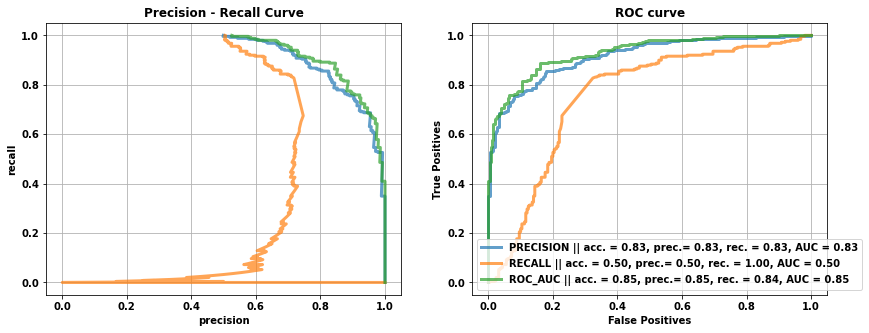

In [67]:
print('Using the SCORING method, it is possible to optimize classifiers for a particular metric.\n')
#comparing different scoring methods
fig, ax = plt.subplots(1,2,figsize=(14,5))
scoringMeth = ['precision', 'recall', 'roc_auc']
#scoringMeth = ['recall', 'roc_auc']
for sm in scoringMeth:
    grid_clf = GridSearchCV(clf, param_grid = grid_values, scoring=sm)
    grid_clf.fit(xTrain, yTrain)
    yDF = grid_clf.decision_function(xTest)
    ypred = grid_clf.predict(xTest)     
    fp, tp, _ = roc_curve(yTest, yDF)
    roc_auc = auc(fp, tp)    
    precision, recall, thresholds = precision_recall_curve(yTest, yDF)
    ax[0].plot(precision,recall, alpha=0.7,lw=3,label=sm);
    ax[1].plot(fp, tp, lw=3, alpha=0.7, label='{} || acc. = {:.2f}, prec.= {:.2f}, rec. = {:.2f}, AUC = {:.2f}'.format(sm.upper(), accuracy_score(yTest, ypred), precision_score(yTest, ypred), recall_score(yTest, ypred),roc_auc_score(yTest, ypred)));
    print('Optimized for ' + sm.upper() + ' | Grid best parameter: ', grid_clf.best_params_)   
    print('Accuracy = {:.2f}, precision = {:.2f}, recall = {:.2f}, AUC = {:.2f}'.format(accuracy_score(yTest, ypred), precision_score(yTest, ypred), recall_score(yTest, ypred),roc_auc_score(yTest, ypred)))
    #print('Grid best parameter: ', grid_clf.best_params_)
    #print('Grid best score (accuracy): ', grid_clf.best_score_)
ax[0].set_xlabel('precision'); ax[0].set_ylabel('recall'); ax[0].set_title('Precision - Recall Curve'); ax[0].grid();
ax[1].set_xlabel('False Positives'); ax[1].set_ylabel('True Positives'); ax[1].set_title('ROC curve'); ax[1].grid();
plt.legend(fontsize=10);

In [68]:
print('Finally, it should be noted that the SCORING metric can also be specified when calculating the *cross_val_score* (using K-fold crossvalidation)')
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, X, Y, cv=5, scoring='roc_auc') # further scoring methods: accuracy, recall, roc_auc, precision
print('Result from 5 folds:', a)
print('Mean AUC: ', np.mean(a))

Finally, it should be noted that the SCORING metric can also be specified when calculating the *cross_val_score* (using K-fold crossvalidation)
Result from 5 folds: [0.83841709 0.81321608 0.84517588 0.78776382 0.80886846]
Mean AUC:  0.8186882654478422


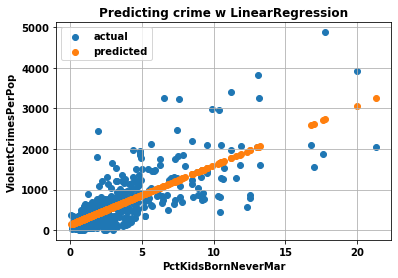

EVALUATION METRICS for crime example with a single predictor
Mean Squared Error (MSE) = 174762.40
R_sq = 0.57


In [69]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
X = crime['PctKidsBornNeverMar']; Y = crime[crime.columns[-1]]; xTrain, xTest, yTrain, yTest = train_test_split(X.values,Y.values, random_state=0)
#reg = LinearRegression().fit(xTrain.reshape(-1,1), yTrain)
reg = LinearRegression().fit(xTrain.reshape(-1,1), yTrain)

ypred = reg.predict(xTest.reshape(-1,1))
plt.scatter(xTest, yTest, label='actual')
plt.scatter(xTest, ypred, label='predicted')
plt.legend(); plt.xlabel('PctKidsBornNeverMar'); plt.ylabel('ViolentCrimesPerPop'); plt.grid(); plt.title('Predicting crime w LinearRegression'); plt.show();

print('EVALUATION METRICS for crime example with a single predictor\nMean Squared Error (MSE) = {:.2f}\nR_sq = {:.2f}'.format(
    mean_squared_error(yTest, ypred),
    r2_score(yTest, ypred)))

# NAIVE Bayes Classifiers
__Make some awkward assumptions (eg independence of features), but very efficient (work well with massive feats) and useful for sanity checks. Types of NB Classifiers:__ 
- Bernoulli (for binary nominal features = absent / present)
- Multinomial (for discrete feats, e.g. word counts, population?)
- Gaussian (for continuos features)

In [70]:
print('2 LABELS (Binomial case, ORANGES vs non-Os)')
fruits = pd.read_table(r'https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/fruit_data_with_colors.txt')
feats = ['mass', 'color_score']
X = fruits[feats]
Y = fruits['fruit_label'] 
Y = np.where(Y == 3, 1, 0) # Recode LABEL: 1 = Orange, 0 = no_orange

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, random_state=0)
scaler = StandardScaler().fit(xTrain); xTrain = scaler.transform(xTrain); xTest = scaler.transform(xTest) 

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(xTrain, yTrain)
print('Naive Bayes Classifier Accuracy: TRAIN = {:.2f}, TEST = {:.2f}'.format(
    nb.score(xTrain, yTrain), nb.score(xTest, yTest)))

dummy = DummyClassifier(strategy='most_frequent').fit(xTrain, yTrain)
print('Dummy Classifier (baseline acc.): TRAIN = {:.2f}, TEST = {:.2f}'.format(
    dummy.score(xTrain, yTrain), dummy.score(xTest, yTest)))


2 LABELS (Binomial case, ORANGES vs non-Os)
Naive Bayes Classifier Accuracy: TRAIN = 0.84, TEST = 0.53
Dummy Classifier (baseline acc.): TRAIN = 0.75, TEST = 0.47


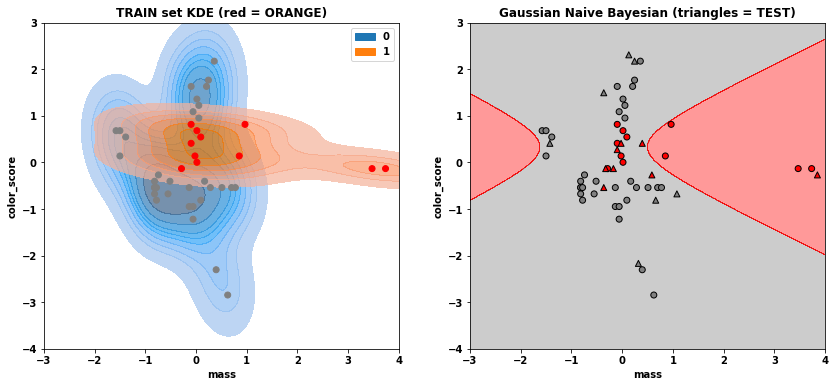

Gaussian NBs usually have parabolic decision boundaries


In [71]:
from matplotlib.colors import ListedColormap
colList = ['gray', 'r']
cmap = ListedColormap(colList)
fig, ax = plt.subplots(1,2,figsize=(14,6))
import seaborn as sns
#sns.color_palette(cmap)
sns.kdeplot(x=xTrain[:,0], y=xTrain[:,1], hue = yTrain, fill=True, alpha=.7, ax=ax[0])
ax[0].scatter(xTrain[:,0], xTrain[:,1], c =yTrain, cmap = cmap)
ax[0].set_xlim([-3,4]); ax[0].set_ylim([-4,3]); ax[0].set_title('TRAIN set KDE (red = ORANGE)') 
ax[0].set_xlabel(feats[0]); ax[0].set_ylabel(feats[1]); 
#ax[0].legend(['not lemon', 'LEMON'])

axLims = [-3, 4, -4, 3]
xv, yv = np.meshgrid(np.linspace(axLims[0], axLims[1], 1000), np.linspace(axLims[2], axLims[3], 1000))
Z = nb.predict(np.c_[xv.ravel(), yv.ravel()])
Z = np.reshape(Z, np.shape(xv))
ax[1].contourf(xv,yv,Z, cmap=cmap, alpha=.4);
ax[1].scatter(xTrain[:,0], xTrain[:,1], c =yTrain, cmap = cmap, edgecolor = 'black');
ax[1].scatter(xTest[:,0], xTest[:,1], c =yTest, marker='^', cmap = cmap, edgecolor = 'black');
ax[1].set_xlabel(feats[0]); ax[1].set_ylabel(feats[1]); plt.title('Gaussian Naive Bayesian (triangles = TEST)'); plt.show();
print('Gaussian NBs usually have parabolic decision boundaries')

In [72]:
print('ALL LABELS')
Y = fruits['fruit_label'] 

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, random_state=0)
scaler = StandardScaler().fit(xTrain); xTrain = scaler.transform(xTrain); xTest = scaler.transform(xTest) 

nb = GaussianNB().fit(xTrain, yTrain)
print('Naive Bayes Classifier Accuracy: TRAIN = {:.2f}, TEST = {:.2f}'.format(
    nb.score(xTrain, yTrain), nb.score(xTest, yTest)))

dummy = DummyClassifier(strategy='most_frequent').fit(xTrain, yTrain)
print('Dummy Classifier (baseline acc.): TRAIN = {:.2f}, TEST = {:.2f}'.format(
    dummy.score(xTrain, yTrain), dummy.score(xTest, yTest)))


ALL LABELS
Naive Bayes Classifier Accuracy: TRAIN = 0.84, TEST = 0.73
Dummy Classifier (baseline acc.): TRAIN = 0.34, TEST = 0.27


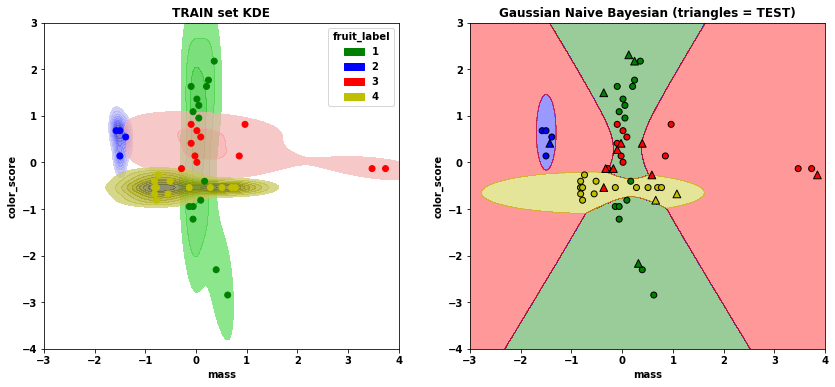

In [73]:
fig, ax = plt.subplots(1,2,figsize=(14,6))
from matplotlib.colors import ListedColormap
colList = ['g', 'b', 'r', 'y']
cmap = ListedColormap(colList)
fruitlabels = ['apple', 'mandarin', 'orange', 'lemon']   

sns.kdeplot(x=xTrain[:,0], y=xTrain[:,1], hue=yTrain, palette = cmap, fill=True, alpha=.7, ax=ax[0])
ax[0].scatter(xTrain[:,0], xTrain[:,1], c =yTrain, cmap = cmap)
ax[0].set_xlim([-3,4]); ax[0].set_ylim([-4,3]); ax[0].set_title('TRAIN set KDE') 
ax[0].set_xlabel(feats[0]); ax[0].set_ylabel(feats[1]); 
#ax[0].legend(['not lemon', 'LEMON'])

#a = np.concatenate((xTrain, xTest),axis=0)
#axLims = [np.floor(a.min(axis=0)*10)/10, np.ceil(a.max(axis=0)*10)/10]
#axLims = [axLims[0][0], axLims[1][0], axLims[0][1], axLims[1][1]]
axLims = [-3, 4, -4, 3]
xv, yv = np.meshgrid(np.linspace(axLims[0], axLims[1], 1000), np.linspace(axLims[2], axLims[3], 1000))
Z = nb.predict(np.c_[xv.ravel(), yv.ravel()])
Z = np.reshape(Z, np.shape(xv))
ax[1].contourf(xv,yv,Z, cmap=cmap, alpha=.4);
ax[1].scatter(xTrain[:,0], xTrain[:,1], c =yTrain, cmap = cmap, edgecolor = 'black');
ax[1].scatter(xTest[:,0], xTest[:,1], 60, c =yTest, marker='^', cmap = cmap, edgecolor = 'black');
ax[1].set_xlabel(feats[0]); ax[1].set_ylabel(feats[1]); plt.title('Gaussian Naive Bayesian (triangles = TEST)');

# Decision Tree ENSEMBLES 
__As DTs are prone to overfit, it makes sense feats to use many of them to achieve a stable solution. Such classifiers / regressors work extremely well and do not require feature scaling. However, they are computationally expensive and tricky to interpret__
- Random Forests (parallel: many models from bootstrapped data)
- Gradient boosted DecisionTrees (sequential: each DT learns from the previous one)

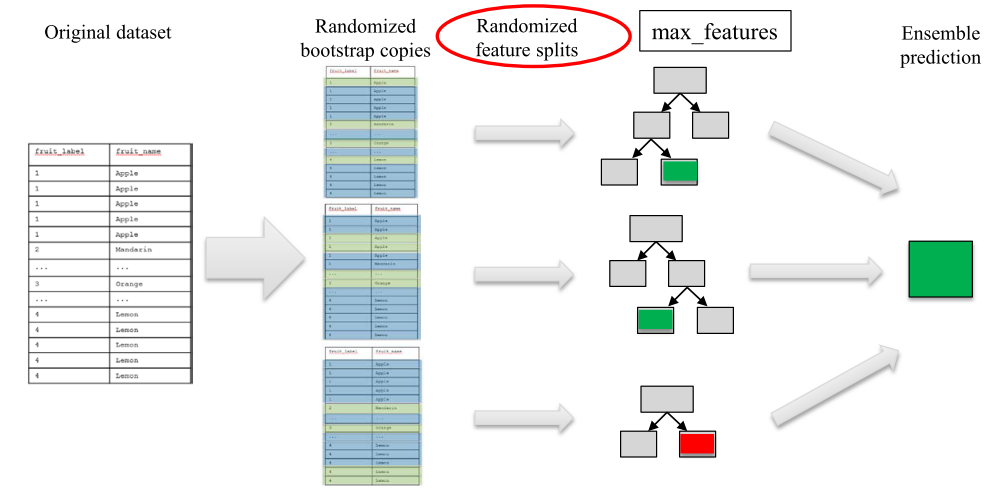

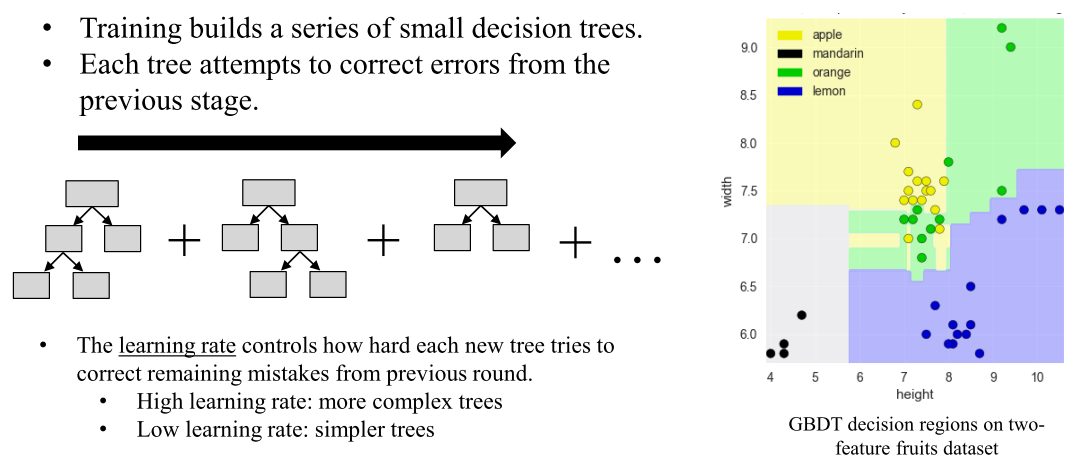

Comparing RandomForest and GradientBoostedDT classifiers with default settings

RandomForest Acc: TRAIN = 1.00, TEST = 0.80
GradientBoosted DTs Acc: TRAIN = 1.00, TEST = 0.73
Dummy Classifier: TRAIN = 0.34, TEST = 0.27

Comparing the confusion matrices for the two classifiers


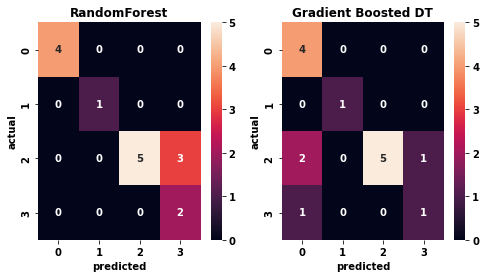

In [74]:
print('Comparing RandomForest and GradientBoostedDT classifiers with default settings\n')
feats = ['mass', 'color_score']
X = fruits[feats].values
Y = fruits['fruit_label'].values
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, random_state=0)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0, n_estimators = 10,n_jobs=-1).fit(xTrain, yTrain) 
# random state is optional, more estimators are better (but slower)
# n_jobs = number of cores used for computations (-1 = all)
print('RandomForest Acc: TRAIN = {:.2f}, TEST = {:.2f}'.format(rf.score(xTrain,yTrain), rf.score(xTest,yTest)))

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state = 0)
gb.fit(xTrain, yTrain)
print('GradientBoosted DTs Acc: TRAIN = {:.2f}, TEST = {:.2f}'.format(gb.score(xTrain,yTrain), gb.score(xTest,yTest)))

dummy = DummyClassifier(strategy='most_frequent').fit(xTrain, yTrain)
print('Dummy Classifier: TRAIN = {:.2f}, TEST = {:.2f}'.format(dummy.score(xTrain, yTrain), dummy.score(xTest, yTest)))

print('\nComparing the confusion matrices for the two classifiers')
fig, ax=plt.subplots(1,2,figsize=(8,4))
cm = confusion_matrix(yTest, rf.predict(xTest));
sns.heatmap(cm, annot=True,ax=ax[0]); ax[0].set_xlabel('predicted'); ax[0].set_ylabel('actual'); ax[0].set_title('RandomForest');
cm = confusion_matrix(yTest, gb.predict(xTest));
sns.heatmap(cm, annot=True,ax=ax[1]); ax[1].set_xlabel('predicted'); ax[1].set_ylabel('actual'); ax[1].set_title('Gradient Boosted DT');


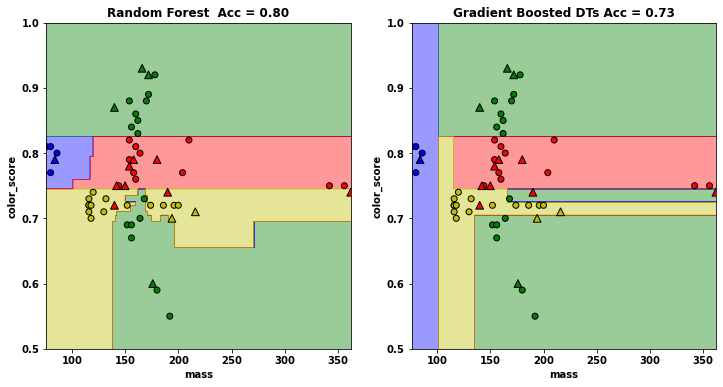

Note the box-shaped boundaries, typical for decision trees. Gradient Booster seems to produce the more parsimonious boundaries


In [75]:
# COMPARE DEC BOUNDARIES
colList = ['g', 'b', 'r', 'y']
cmap = ListedColormap(colList)
fruitlabels = ['apple', 'mandarin', 'orange', 'lemon']   

# determine axes
a = np.concatenate((xTrain, xTest),axis=0)
axLims = [np.floor(a.min(axis=0)*10)/10, np.ceil(a.max(axis=0)*10)/10]
axLims = [axLims[0][0], axLims[1][0], axLims[0][1], axLims[1][1]]
fig, ax = plt.subplots(1,2,figsize=(12,6))

# RandomForest
xv, yv = np.meshgrid(np.linspace(axLims[0], axLims[1], 1000), np.linspace(axLims[2], axLims[3], 1000))
Z = rf.predict(np.c_[xv.ravel(), yv.ravel()])
Z = np.reshape(Z, np.shape(xv))
ax[0].contourf(xv,yv,Z, cmap=cmap, alpha=.4);
ax[0].scatter(xTrain[:,0], xTrain[:,1], c =yTrain, cmap = cmap, edgecolor = 'black');
ax[0].scatter(xTest[:,0], xTest[:,1], 60, c =yTest, marker='^', cmap = cmap, edgecolor = 'black');
ax[0].set_xlabel(feats[0]); ax[0].set_ylabel(feats[1]); ax[0].set_title('Random Forest  Acc = {:.2f}'.format(rf.score(xTest, yTest))); 

# Gradient Boosted DTs
Z = gb.predict(np.c_[xv.ravel(), yv.ravel()])
Z = np.reshape(Z, np.shape(xv))
ax[1].contourf(xv,yv,Z, cmap=cmap, alpha=.4);
ax[1].scatter(xTrain[:,0], xTrain[:,1], c =yTrain, cmap = cmap, edgecolor = 'black');
ax[1].scatter(xTest[:,0], xTest[:,1], 60, c =yTest, marker='^', cmap = cmap, edgecolor = 'black');
#ax[1].set_xlabel(feats[0]); ax[1].set_ylabel(feats[1]); ax[1].set_title('Gradient Boosted DTs (triangles = TEST)'); plt.show();
ax[1].set_xlabel(feats[0]); ax[1].set_ylabel(feats[1]); ax[1].set_title('Gradient Boosted DTs Acc = {:.2f}'.format(gb.score(xTest,yTest))); plt.show();
print('Note the box-shaped boundaries, typical for decision trees. Gradient Booster seems to produce the more parsimonious boundaries')


Using RandomForest & GradientBoostedDT on larger datasets

CLASSIFIERS: Credit card FRAUD data set [DISCRETE 2 alternatives] n = 5424 cases in test set
RandomForest Acc: TRAIN = 0.9995, TEST = 0.9963
GradientBoosted DTs Acc: TRAIN = 0.9997, TEST = 0.9950
Dummy Classifier: TRAIN = 0.9830, TEST = 0.9853


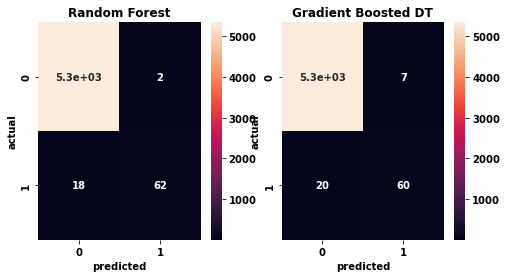

In [85]:
print('Using RandomForest & GradientBoostedDT on larger datasets\n')
df = pd.read_csv(r'https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/fraud_data.csv')
X = df[df.columns[:-1]].values
Y = df[df.columns[-1]].values
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, random_state=0)

print('CLASSIFIERS: Credit card FRAUD data set [DISCRETE 2 alternatives] n = {:} cases in test set'.format(len(xTest)))
rf = RandomForestClassifier(random_state=0, n_estimators = 10,n_jobs=-1).fit(xTrain, yTrain) 
print('RandomForest Acc: TRAIN = {:.4f}, TEST = {:.4f}'.format(rf.score(xTrain,yTrain), rf.score(xTest,yTest)))

gb = GradientBoostingClassifier(random_state = 0).fit(xTrain, yTrain)
print('GradientBoosted DTs Acc: TRAIN = {:.4f}, TEST = {:.4f}'.format(gb.score(xTrain,yTrain), gb.score(xTest,yTest)))

dummy = DummyClassifier(strategy='most_frequent').fit(xTrain, yTrain)
print('Dummy Classifier: TRAIN = {:.4f}, TEST = {:.4f}'.format(
    dummy.score(xTrain, yTrain), dummy.score(xTest, yTest)))

fig,ax=plt.subplots(1,2,figsize=(8,4))
cmRF = confusion_matrix(yTest, rf.predict(xTest))
cmGB = confusion_matrix(yTest, gb.predict(xTest))
sns.heatmap(cmRF, annot=True, ax=ax[0]); ax[0].set_xlabel('predicted'); ax[0].set_ylabel('actual'); ax[0].set_title('Random Forest')
sns.heatmap(cmGB, annot=True, ax=ax[1]); ax[1].set_xlabel('predicted'); ax[1].set_ylabel('actual'); ax[1].set_title('Gradient Boosted DT')
plt.show()

In [77]:
# REGRESSOR ---------------
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

crime = pd.read_table(r"https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/CommViolPredUnnormalizedData.txt", sep=',', na_values='?')
columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
crime = crime[crime.columns[columns_to_keep]].dropna()
X = crime[crime.columns[:-1]]
Y = crime[crime.columns[-1]]

xTrain, xTest, yTrain, yTest = train_test_split(X,Y, random_state=0)
print('Violent CRIME data set [CONTINUOUS regression]\n')
rf = RandomForestRegressor(random_state=0, n_estimators = 10,n_jobs=-1).fit(xTrain, yTrain) 
print('RandomForrest: TRAIN R_sq = {:.4f}, TEST R_sq= {:.4f}'.format(rf.score(xTrain,yTrain), rf.score(xTest,yTest)))

gb = GradientBoostingRegressor(random_state=0).fit(xTrain, yTrain)
print('Gradient Boosting: TRAIN R_sq = {:.4f}, TEST R_sq = {:.4f}'.format(gb.score(xTrain,yTrain), gb.score(xTest,yTest)))

dummy = DummyRegressor(strategy='mean').fit(xTrain, yTrain)
print('Dummy Classifier (baseline acc.): TRAIN R_sq = {:.4f}, TEST R_sq = {:.4f}'.format(dummy.score(xTrain, yTrain), dummy.score(xTest, yTest)))

Violent CRIME data set [CONTINUOUS regression]

RandomForrest: TRAIN R_sq = 0.9235, TEST R_sq= 0.6304
Gradient Boosting: TRAIN R_sq = 0.8559, TEST R_sq = 0.6463
Dummy Classifier (baseline acc.): TRAIN R_sq = 0.0000, TEST R_sq = -0.0000


# Neural Networks
- Architecture: Input layer, hidden layer, output layer
- linear model (sum of weights X feat_scores) with a non-linear activation function

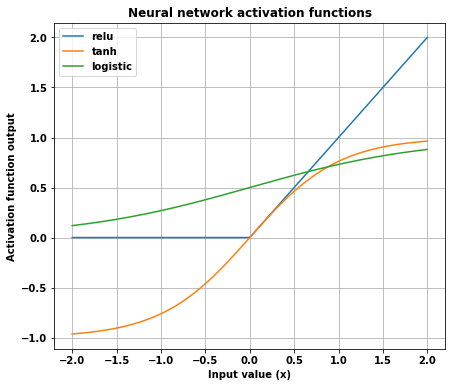

In [78]:
xrange = np.linspace(-2, 2, 200)
plt.figure(figsize=(7,6))
plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')
plt.grid(); plt.show();

In [80]:
print('FRUITS dataset - 2 feats, dichotomous DV (ORANGE vs non-orange), default classifier settings, lbfgs solver')
fruits = pd.read_table(r'https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/fruit_data_with_colors.txt')
feats = ['mass', 'color_score']
X = fruits[feats]
Y = fruits['fruit_label'] 
Y = np.where(Y == 3, 1, 0) # Recode LABEL: 1 = LEMON, 0 = no_orange

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, random_state=0)
scaler = StandardScaler().fit(xTrain); xTrain = scaler.transform(xTrain); xTest = scaler.transform(xTest) 

from sklearn.neural_network import MLPClassifier
#nn = MLPClassifier(hidden_layer_sizes = 10, solver='lbfgs',random_state = 0).fit(xTrain, yTrain)
nn = MLPClassifier(solver='lbfgs', random_state = 0).fit(xTrain, yTrain)
print('Neural Networks: TRAIN = {:.2f}, TEST = {:.2f}'.format(
    nn.score(xTrain, yTrain), nn.score(xTest, yTest)))

from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent').fit(xTrain, yTrain)
print('Dummy Classifier (baseline acc.): TRAIN = {:.2f}, TEST = {:.2f}'.format(
    dummy.score(xTrain, yTrain), dummy.score(xTest, yTest)))

print('\nUsing the classifier for the much larger credit card FRAUD dataset:')
df = pd.read_csv(r'https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/fraud_data.csv')
X = df[df.columns[:-1]]
Y = df[df.columns[-1]]
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, random_state=0)
scaler = StandardScaler().fit(xTrain); xTrain = scaler.transform(xTrain); xTest = scaler.transform(xTest) 

nn = MLPClassifier(solver='lbfgs', random_state = 0).fit(xTrain, yTrain)
print('Neural Networks: TRAIN = {:.4f}, TEST = {:.4f}'.format(
    nn.score(xTrain, yTrain), nn.score(xTest, yTest)))
dummy = DummyClassifier(strategy='most_frequent').fit(xTrain, yTrain)
print('Dummy Classifier (baseline acc.): TRAIN = {:.4f}, TEST = {:.4f}'.format(
    dummy.score(xTrain, yTrain), dummy.score(xTest, yTest)))

FRUITS dataset - 2 feats, dichotomous DV (ORANGE vs non-orange), default classifier settings, lbfgs solver
Neural Networks: TRAIN = 1.00, TEST = 0.93
Dummy Classifier (baseline acc.): TRAIN = 0.75, TEST = 0.47

Using the classifier for the much larger credit card FRAUD dataset:
Neural Networks: TRAIN = 1.0000, TEST = 0.9941
Dummy Classifier (baseline acc.): TRAIN = 0.9830, TEST = 0.9853


INFLUENCE OF ACTIVATION FUNCTION (for hidden layer with 5 units and low regularization alpha = 0.001)


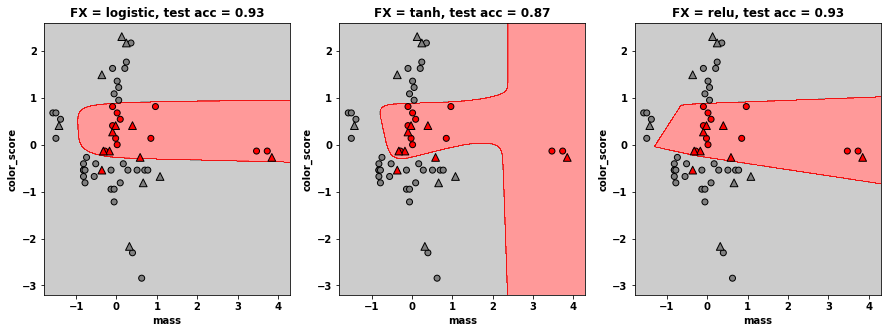

In [81]:
print('INFLUENCE OF ACTIVATION FUNCTION (for hidden layer with 5 units and low regularization alpha = 0.001)')
fruits = pd.read_table(r'https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/fruit_data_with_colors.txt')
feats = ['mass', 'color_score']
X = fruits[feats]
Y = fruits['fruit_label'] 
Y = np.where(Y == 3, 1, 0) # Recode LABEL: 1 = LEMON, 0 = no_orange
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, random_state=0)
scaler = StandardScaler().fit(xTrain); xTrain = scaler.transform(xTrain); xTest = scaler.transform(xTest) 

colList = ['gray', 'r']
cmap = ListedColormap(colList)
clfList = [MLPClassifier(hidden_layer_sizes = 5, alpha = 0.001, solver='lbfgs',activation = 'logistic',random_state = 0).fit(xTrain, yTrain), 
           MLPClassifier(hidden_layer_sizes = 5, alpha = 0.001, solver='lbfgs',activation = 'tanh', random_state = 0).fit(xTrain, yTrain),
           MLPClassifier(hidden_layer_sizes = 5, alpha = 0.001, solver='lbfgs',activation = 'relu', random_state = 0).fit(xTrain, yTrain)]

xfig, ax = plt.subplots(1,3,figsize=(15,5))
ax = ax.ravel()

a = np.concatenate((xTrain, xTest),axis=0)
axLims = [np.floor(a.min(axis=0)*11)/10, np.ceil(a.max(axis=0)*11)/10]
axLims = [axLims[0][0], axLims[1][0], axLims[0][1], axLims[1][1]]
xv, yv = np.meshgrid(np.linspace(axLims[0], axLims[1], 1000), np.linspace(axLims[2], axLims[3], 1000))

tStr = ['logistic', 'tanh', 'relu']
for thisCLF, thisAX, thisT in zip(clfList, ax, tStr):          
    Z = thisCLF.predict(np.c_[xv.ravel(), yv.ravel()])
    Z = np.reshape(Z, np.shape(xv))
    thisAX.contourf(xv,yv,Z, cmap=cmap, alpha=.4);
    thisAX.scatter(xTrain[:,0], xTrain[:,1], c =yTrain, cmap = cmap, edgecolor = 'black');
    thisAX.scatter(xTest[:,0], xTest[:,1], 60, c =yTest, marker='^', cmap = cmap, edgecolor = 'black');
    thisAX.set_xlabel(feats[0]); thisAX.set_ylabel(feats[1]); 
    thisAX.set_title('FX = ' + thisT + ', test acc = {:.2f}'.format(thisCLF.score(xTest, yTest))); 

INFLUENCE OF PARAMETERS
#hidden layers
regularization alpha (higher values = more regularization)


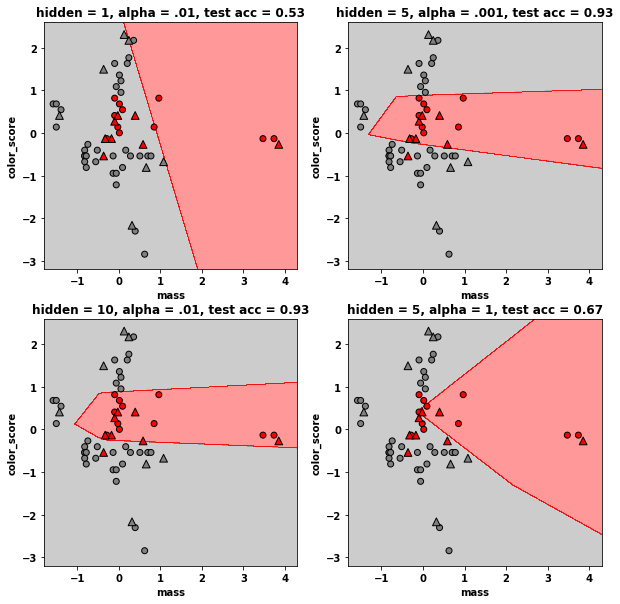

In [82]:
print('INFLUENCE OF PARAMETERS\n#hidden layers\nregularization alpha (higher values = more regularization)')
colList = ['gray', 'r']
cmap = ListedColormap(colList)
clfList = [MLPClassifier(hidden_layer_sizes = 1, alpha = 0.01, solver='lbfgs', random_state = 0).fit(xTrain, yTrain), 
           MLPClassifier(hidden_layer_sizes = 5, alpha = 0.001, solver='lbfgs', random_state = 0).fit(xTrain, yTrain),
           MLPClassifier(hidden_layer_sizes = 10, alpha = 0.01, solver='lbfgs', random_state = 0).fit(xTrain, yTrain),
           MLPClassifier(hidden_layer_sizes = 5, alpha = 1, solver='lbfgs', random_state = 0).fit(xTrain, yTrain)]

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax = ax.ravel()

a = np.concatenate((xTrain, xTest),axis=0)
axLims = [np.floor(a.min(axis=0)*11)/10, np.ceil(a.max(axis=0)*11)/10]
axLims = [axLims[0][0], axLims[1][0], axLims[0][1], axLims[1][1]]
xv, yv = np.meshgrid(np.linspace(axLims[0], axLims[1], 1000), np.linspace(axLims[2], axLims[3], 1000))

tStr = ['hidden = 1, alpha = .01', 'hidden = 5, alpha = .001', 'hidden = 10, alpha = .01', 'hidden = 5, alpha = 1']
for thisCLF, thisAX, thisT in zip(clfList, ax, tStr):          
    Z = thisCLF.predict(np.c_[xv.ravel(), yv.ravel()])
    Z = np.reshape(Z, np.shape(xv))
    thisAX.contourf(xv,yv,Z, cmap=cmap, alpha=.4);
    thisAX.scatter(xTrain[:,0], xTrain[:,1], c =yTrain, cmap = cmap, edgecolor = 'black');
    thisAX.scatter(xTest[:,0], xTest[:,1], 60, c =yTest, marker='^', cmap = cmap, edgecolor = 'black');
    thisAX.set_xlabel(feats[0]); thisAX.set_ylabel(feats[1]); 
    thisAX.set_title(thisT + ', test acc = {:.2f}'.format(thisCLF.score(xTest, yTest))); 

Predicting fruit mass with 3 featurs: Comparing neural networks with tanh and relu activation functions
Parameters: Hidden_units = [100, 10], solver = lgbfs, max_iter = 10k



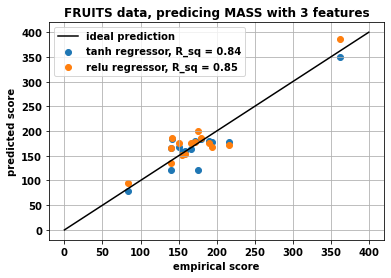

Note that fairly many hidden units were used for this problem. If less were used, accuracy would deteriorate dramatically


In [83]:
print('Predicting fruit mass with 3 featurs: Comparing neural networks with tanh and relu activation functions\nParameters: Hidden_units = [100, 10], solver = lgbfs, max_iter = 10k\n')
fruits = pd.read_table(r'https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/fruit_data_with_colors.txt')
feats = ['height', 'width', 'color_score']
X = fruits[feats]
Y = fruits['mass'] 
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, random_state=0)
scaler = StandardScaler().fit(xTrain); xTrain = scaler.transform(xTrain); xTest = scaler.transform(xTest) 

from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(activation = 'tanh', hidden_layer_sizes = [100, 10], solver='lbfgs', random_state = 0, max_iter = 10000).fit(xTrain, yTrain)
nn.score(xTest,yTest)
nr = MLPRegressor(activation = 'relu', hidden_layer_sizes = [100, 10], solver='lbfgs', random_state = 0, max_iter = 10000).fit(xTrain, yTrain)
nr.score(xTest,yTest)

plt.plot([0, 400], [0, 400], c='black', label='ideal prediction')
plt.scatter(yTest, nn.predict(xTest), label='tanh regressor, R_sq = {:.2f}'.format(nn.score(xTest,yTest)))
plt.scatter(yTest, nr.predict(xTest), label='relu regressor, R_sq = {:.2f}'.format(nr.score(xTest,yTest)))
plt.xlabel('empirical score'); plt.ylabel('predicted score'); plt.grid(); plt.title('FRUITS data, predicing MASS with 3 features'); plt.legend(); plt.show();
print('Note that fairly many hidden units were used for this problem. If less were used, accuracy would deteriorate dramatically')

Finally, compare Neural Networks with LinearRegression on the CRIME dataset


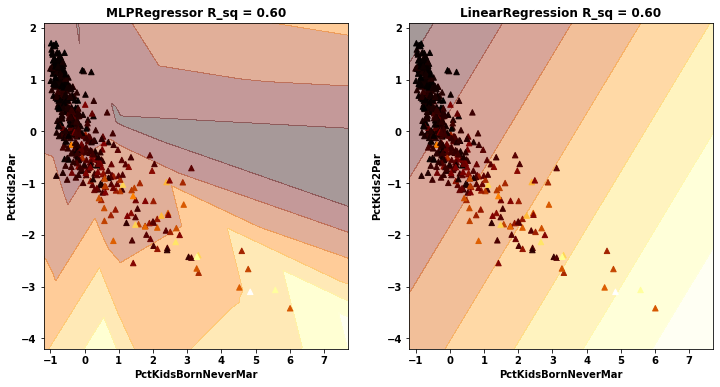

At first glance, the two regressors do similarly well. However, the neural network requires careful tuning (currently: 2 hidden layers a 10 units, relu activation FX, 10k max_iter) to get reasonable results. It produced poor results with many other settings, and it sucked pretty much when all 88 feats were used - Lasso would do a much better job there.


In [84]:
print('Finally, compare Neural Networks with LinearRegression on the CRIME dataset')
crime = pd.read_table(r"https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/CommViolPredUnnormalizedData.txt", sep=',', na_values='?')
columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
crime = crime[crime.columns[columns_to_keep]].dropna()
X = crime[['PctKidsBornNeverMar', 'PctKids2Par']] # Percentage of kids born to Never-Marrieds
Y = crime.ViolentCrimesPerPop

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, random_state=0)
scaler = StandardScaler().fit(xTrain); xTrain = scaler.transform(xTrain); xTest = scaler.transform(xTest) 

clfLIST = [MLPRegressor(activation = 'relu', hidden_layer_sizes = [10, 10], solver='lbfgs', random_state = 0, max_iter = 10000).fit(xTrain, yTrain), LinearRegression().fit(xTrain, yTrain)]

a = np.concatenate((xTrain, xTest),axis=0)
axLims = [np.floor(a.min(axis=0)*11)/10, np.ceil(a.max(axis=0)*11)/10]
axLims = [axLims[0][0], axLims[1][0], axLims[0][1], axLims[1][1]]
xv, yv = np.meshgrid(np.linspace(axLims[0], axLims[1], 1000), np.linspace(axLims[2], axLims[3], 1000))

fig, ax = plt.subplots(1,2,figsize=(12,6))
import matplotlib
cmap = matplotlib.cm.get_cmap('afmhot')
tStr = ['MLPRegressor', 'LinearRegression']
for thisCLF, thisAx, thisStr in zip(clfLIST, ax, tStr):
    Z = thisCLF.predict(np.c_[xv.ravel(), yv.ravel()])
    Z = np.reshape(Z, np.shape(xv))
    thisAx.contourf(xv,yv,Z, cmap = cmap , alpha=.4);
    thisAx.scatter(xTest[:,0], xTest[:,1], 30, c =yTest, marker='^', cmap = cmap);
    thisAx.set_xlabel('PctKidsBornNeverMar'); thisAx.set_ylabel('PctKids2Par'); thisAx.set_title(thisStr + ' R_sq = {:.2f}'.format(thisCLF.score(xTest,yTest)))
plt.show()
print('At first glance, the two regressors do similarly well. However, the neural network requires careful tuning (currently: 2 hidden layers a 10 units, relu activation FX, 10k max_iter) to get reasonable results. It produced poor results with many other settings, and it sucked pretty much when all 88 feats were used - Lasso would do a much better job there.')